# UNA COMPARACIÓN DE LAS REDES DE COMERCIO INTERNACIONAL DE     PETRÓLEO CRUDO: 2012 - 2016


## Introducción 

En el año 2016 el precio promedio del barril de petróleo crudo, fijado por la Organización
de Países Exportadores de Petróleo (OPEP), fue de 26,5 dólares estadounidenses*,
siendo el más bajo de los últimos 15 años, esta caída “repentina” del precio del barril, que
para el año 2012 rondaba los 109.45 dólares estadounidense*, tuvo fuertes
repercusiones en las economías de países como Colombia, Venezuela y, en general de
los países pertenencientes a la OPEP, organización que parece estar perdiendo influencia en el mercado
internacional de este producto. Para tener una visión más completa de lo que ha venido
ocurriendo en este mercado es necesario analizar las dinámicas del comercio
internacional de crudo, en este periodo de tiempo, como una red compleja o grafo, donde
los nodos o agentes sean los diferentes países que participan en este mercado y sus
conexiones (o arcos) los flujos comerciales entre ellos, ya sean importaciones o
exportaciones.
A raíz de la caída del precio del petróleo o, “posiblemente”, como su consecuencia, en el
periodo que va de los años 2012 a 2016 se pudieron haber dado algunos cambio
significativos en la estructura de las redes de comercio internacional del crudo, dichos
cambios, si ocurrieron realmente, podrían complementar la visión que se tiene sobre la
crisis de los precios del petróleo que se han venido dado desde el 2014 hasta hoy.


## Librerias necesarias

In [1]:
import pandas as pd
import networkx as nx
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

## Caraga y generacion de la base de datos a trabajar 2012

En las siguientes linias de comandos se cargan las bases de datos con las cuales se realizara la red, estas bases se unifican e un solo DataFrame. 

In [2]:
ORIG =pd.DataFrame(columns=['country_origin_id']) # Lista de nodos de destino
DEST =pd.DataFrame(columns=['country_destination_id']) # Lista de nodos de destino

EDGES =pd.DataFrame(columns=('country_origin_id','country_destination_id')) # Lista de aristas de la red
WEIGHT=pd.DataFrame(columns=['export_val']) # Lista de los pesos de las aristas de la red 

DFPOND=pd.DataFrame(columns=('country_origin_id','country_destination_id','export_val'))
POND=pd.DataFrame(columns=['export_val']) # Valores aristas Ponderado

m=0
for j in range(118) :
    orig=pd.read_csv('dat2012/2012_' + str(j)+'.csv',index_col=0)
    dest=pd.read_csv('dat2012/2012_' + str(j)+'.csv',index_col=0)    
    edges=pd.read_csv('dat2012/2012_' + str(j)+'.csv',index_col=0) #---> Cargar la base de datos 
    Weight= pd.read_csv('dat2012/2012_' + str(j)+'.csv',index_col=0)
    
     # Para trabajar medidas del grafo ponderado.
    dfpond=orig[['country_origin_id','country_destination_id','export_val']]
    #-----------------------------------------
    
    orig=orig[['country_origin_id']]
    dest=dest[['country_destination_id']]
    edges=edges[['country_origin_id','country_destination_id']] 
    Weight= Weight[['export_val']]
    
    orig=orig.values
    dest=dest.values
    edges=edges.values
    Weight= Weight.values
    
    dfpond=dfpond.values #grafo ponderado
    
    for i in range(len(edges)) : 
        
        ORIG.loc[i+m]=orig[i]
        DEST.loc[i+m]=dest[i]
        
        
        EDGES.loc[i+m]=edges[i]
        WEIGHT.loc[i+m]=Weight[i]/109.45e+9
        
        DFPOND.loc[i+m]=dfpond[i]
        POND.loc[i+m]=Weight[i]
         
        
    m=i+m+1

#print(PDPOND)

## Visualizacion del grafo
### Grafo dirigido 

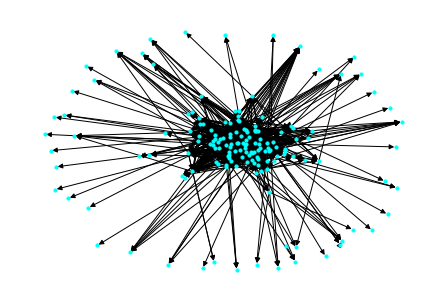

In [3]:
G = nx.DiGraph() #--->DiGrafo para hacer un grado dirigido 


G.add_edges_from(EDGES.values)

G.remove_node("XXB") # se remueve los nodos xx- que hacer referencia a zonas continentales.
G.remove_node("XXF")
G.remove_node("XXA")
G.remove_node("XXC")
G.remove_node("XXD")
G.remove_node("XXG")


nx.draw(G,font_size=0.5,node_size=10,node_color='cyan')

### Grafo dirigido y pesado 

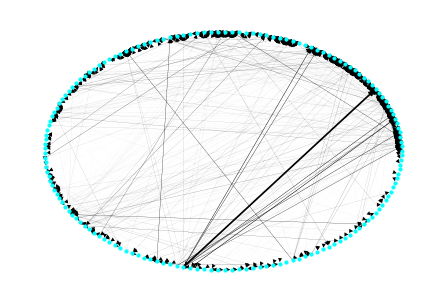

In [4]:
weight=WEIGHT.values #---> definimos los pesos para cada uno de los interaciones entre nodos


nx.draw_circular(G,width=weight,node_size=10,font_size=10,node_color='cyan') # Grafo circular
#node_size=node_sizes --> tamaño de los nodos

## Medidas de Grafo
### Grado promedio
El grado promedio del grafo no dirigidos se puede calcular como: 
$$\bar{d}=\frac{\sum_{i=1}^g d(n_i)}{g}=\frac{2L}{g}$$

Donde $d(n_i)$ es el numero de vinvulos que tiene el nodo $i$, $g$ es el numero total de nodos de la red, y $L$ el numero tatal de aristas. 
para encontrar el numero de nodos podemos simplemente usar la funcion nx.number_of_nodes(G) que devuelve la cantidad total de nodos del grafo, y para encontrar el numero total  de aristas usamos el funcion nx.number_of_edges(G) de Networkx:

In [5]:
g=nx.number_of_nodes(G)
print('g=',g)
L=nx.number_of_edges(G)
print('L=',L)

g= 161
L= 1030


Definimos una funcion que nos permite calcular el valor del grado promedio de nuestra red, suponiendola no dirigida, como : 

In [6]:
nodos=G.nodes
def grado_promedio(G,nodos):
    d=nx.degree(G)
    g=nx.number_of_nodes(G)
    suma=0
    for i in nodos:
        suma=d[i]+suma 
    grado_promedio=suma/g
    return grado_promedio 

print(grado_promedio(G,nodos))

12.79503105590062


En esta funcion se implementa la sumatoria del numero de vinculos de cada uno de los nodos divido por el numero total de nodos. Este calculo tambien se puede hacer simplemente dividiendo el doble del numero total de aritas $L$ por el numero total de nodos $g$, para el caso del grafo no dirigido: 

In [7]:
grado_promedio=2*L/g
print(grado_promedio)

12.79503105590062


Ahora para el caso del grafo dirigido, que es del tipo que necesitamos, el vinculo existente entre dos nodos se cuenta solo una vez, con esto la expresion cambia como: 
 $$\bar{d}=\frac{L}{g} $$

In [8]:
grado_promedio=L/g
print(grado_promedio)

6.39751552795031


Este seria entonces el grado promedio de nuestra red dirigida, y quiere decir que en promedio cada pais exporta a 7 paises. pero esta informacion por ahora no parece dicir mucho.  

### Varianza de los nodos

La varianza de los nodos se calcula como:

$$s_D^2=\frac{\sum_{i=1}^g (d(n_i)- \bar{d})^2}{g} $$

esta medida que tambien se puede interpretar como la variabilidad nodal, muestra que tan diferente actuan los ajentes de la red en cuanto a sus relaciones. 

In [9]:
nodos=G.nodes
def varianza(G,nodos):
    g=nx.number_of_nodes(G)
    grado_promedio=L/g    
    d_out=G.out_degree
    suma=0
    for i in nodos:
        suma=(d_out[i]-grado_promedio)**2 +suma 
    s=suma/g
    return s 

print(varianza(G,nodos))

81.64322364106327


Este medida pude ser muy poco util en nuestro analisis, si se tiene una red libre de escala, como es el caso. 

### Densidad 

Una medida importante de un grafo es su densidad, que se define como el numero de vinculos totales sobre el numero de vinculos posibles. este ultimo se puede calcular como 

$$L_p=\frac{g(g-1)}{2} $$

Para grafos no dirigidos. Para el caso de grafos dirigidos se define como:

$$L_p=g(g-1) $$

Con esto entonces la densidad es: 

$$\rho=\frac{L}{L_p} $$

que para este grafo sera:


In [10]:
L_p=g*(g-1)
print('L_p =', L_p)
rho=L/L_p
print('Densidad =',rho)

L_p = 25760
Densidad = 0.03998447204968944



### Distribucion de grados

Realicemos un histograma para ver el numero de vinvulos mas frecuentes en la red, en otras palabras la distribucion de grado en el grafo, para esto implementamos el siguiente algoritmo.

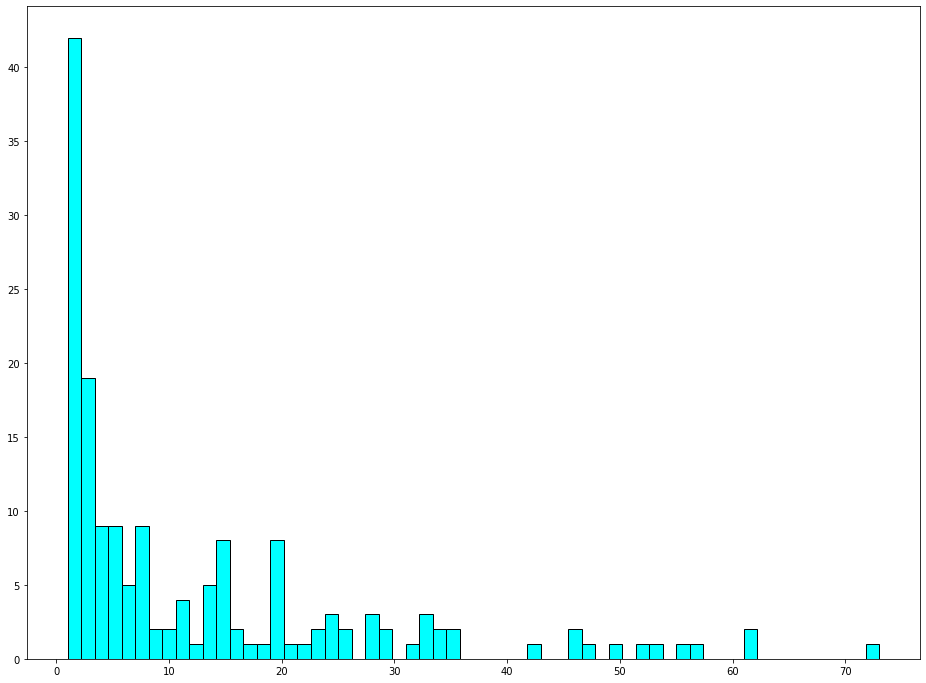

In [11]:
D=[] # un vector donde vamos a colocar el numero de vinvulos de todos los nodos
d=nx.degree(G) # Vector que contiene el par ordenado del nodo y su numero de vinculos
for i in nodos: 
    D.append(d[i])
    
# Grafica del histograma de numero vinculos(frecuencias)     
plt.figure(figsize=(16,12)) # Tamaño del grafico 
plt.hist(D, bins=60, alpha=1, edgecolor = 'black', color = 'cyan',  linewidth=1)
#plt.clf()
#plt.title('MOS')
plt.show()

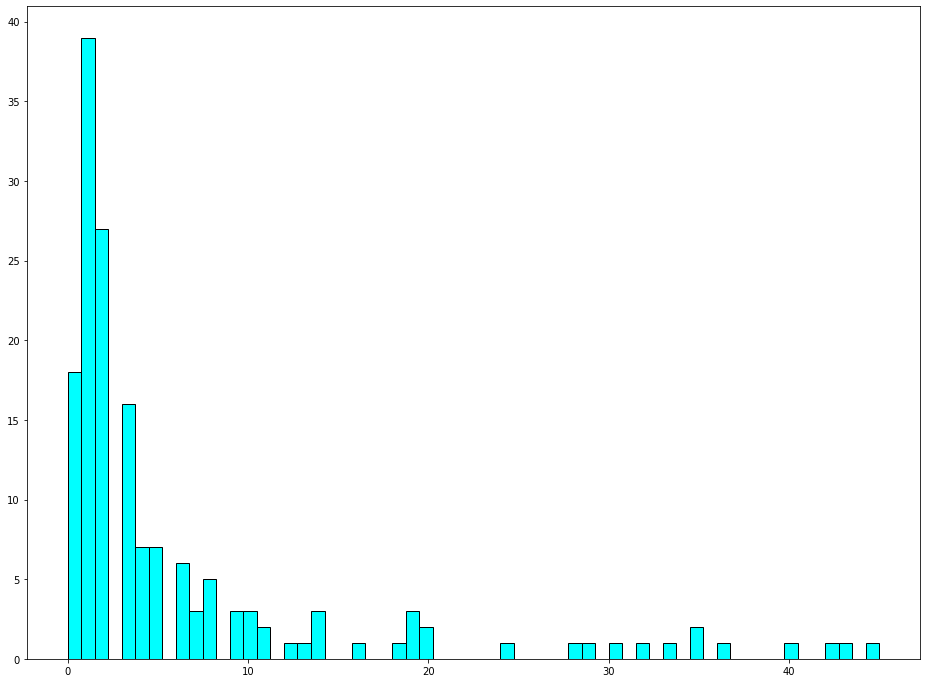

In [12]:
D_in=[] # un vector donde vamos a colocar el numero de vinvulos de todos los nodos
d=G.in_degree(G) # Vector que contiene el par ordenado del nodo y su numero de vinculos
for i in nodos: 
    D_in.append(d[i])
    
# Grafica del histograma de numero vinculos(frecuencias)     
plt.figure(figsize=(16,12)) # Tamaño del grafico 
plt.hist(D_in, bins=60, alpha=1, edgecolor = 'black',  linewidth=1 , color = 'cyan')
#plt.clf()
#plt.title('MOS')
plt.show()

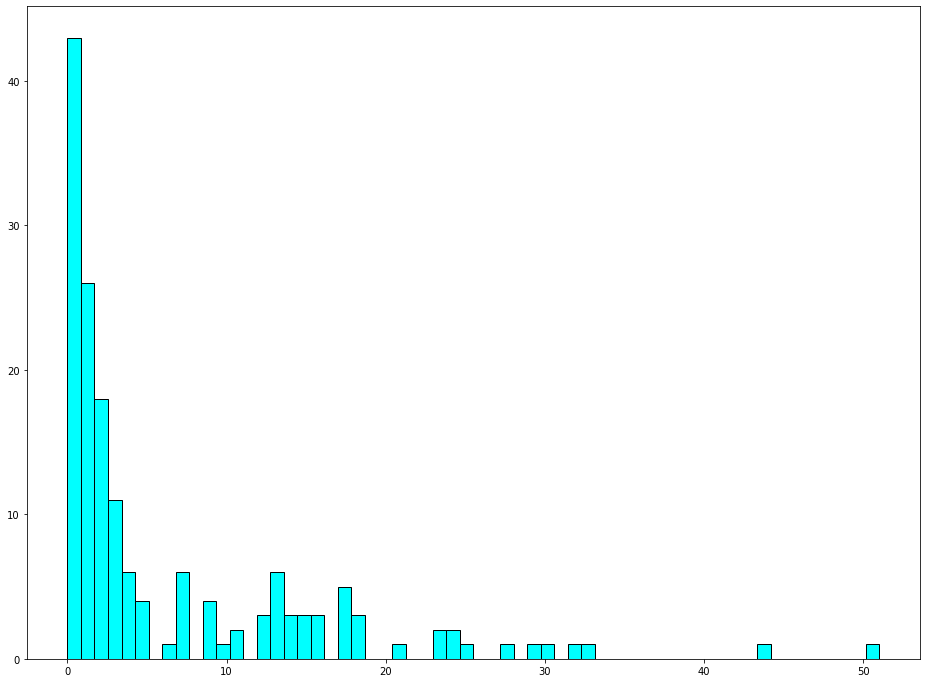

In [13]:
D_out=[] # un vector donde vamos a colocar el numero de vinvulos de todos los nodos
d=G.out_degree(G) # Vector que contiene el par ordenado del nodo y su numero de vinculos
for i in nodos: 
    D_out.append(d[i])
    
# Grafica del histograma de numero vinculos(frecuencias)     
plt.figure(figsize=(16,12)) # Tamaño del grafico 
plt.hist(D_out, bins=60, alpha=1, edgecolor = 'black',  linewidth=1, color = 'cyan')
#plt.clf()
#plt.title('MOS')
plt.show()

Este histograma muestra que la mayoria de los nodos tiene pocas aristas, es decir que la gran mayoria de los paises tiene baja conectividad.¿seguira una ley de potencias?, el coportamiento parece ser el de una exponencial negativa, lo que nos dice que nuestro grafo es libre de escala, pero para afirmar esto primero tenemos que ver que efectivamente sigue una ley de potencias.

### Ley de potencias

Queremos ver cual es la probabilidad de encontrar un vertice con un numero de grado dado. para ello encontramos la probabilidad como: 
$$P(k_i)=\frac{\sum \text{vertices de grado igual a }k_i}{g} $$
Para esto implementamos el siguiente algoritmo, en el cual guardamos r la probabilidad de cada grado en el vector $P$ para el casa de la red no dirigida, o $P_{in}$ para el numero de grado de entrada y $P_{out}$ Para el grado de salida.

In [14]:

P=[]
X=[]
for i in range(1,max(D)+1):
    if D.count(i) != 0: 
        P.append(D.count(i)/len(D))
        X.append(i)
        
P_in=[]
X_in=[]
for i in range(1,max(D_in)+1):
    if D_in.count(i) != 0: 
        P_in.append(D_in.count(i)/len(D_in))
        X_in.append(i)  

P_out=[]
X_out=[]
for i in range(1,max(D)+1):
    if D_out.count(i) != 0: 
        P_out.append(D_out.count(i)/len(D_out))
        X_out.append(i)        
        

        

Graficamos el vector de probabilidades de los grados vs el numero de grado. 

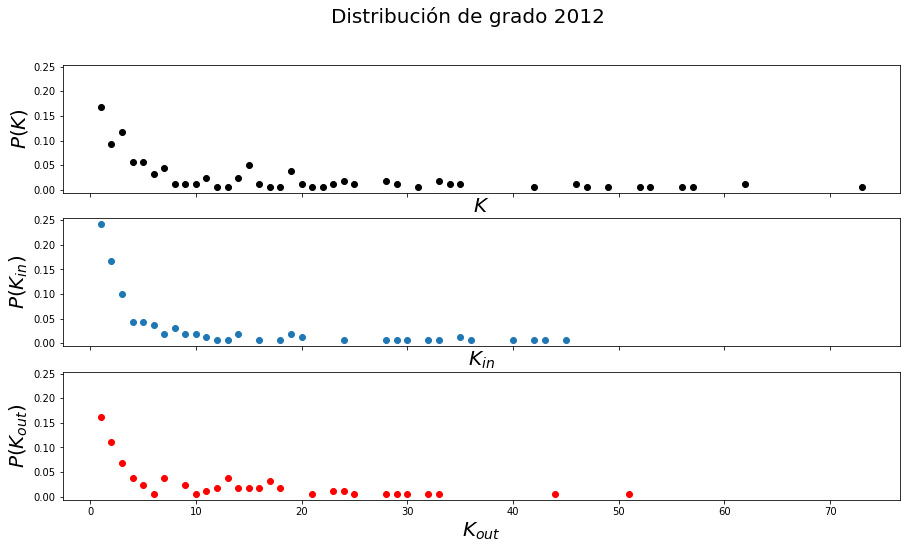

In [15]:
# GRAFICA DE LA PROVAVILIDAD VS EL NUMERO DE GRADO        
fig, axs = plt.subplots( 3 ,sharex = True, sharey = True, figsize=(15,8))

fig.suptitle('Distribución de grado 2012',fontsize=20)
axs[0].plot(X,P,'ko')         
axs[0].set_xlabel(r'$K$',fontsize=20)
axs[0].set_ylabel(r'$P(K)$',fontsize=20)

axs[1].plot(X_in,P_in,'o')         
axs[1].set_xlabel(r'$K_{in}$',fontsize=20)
axs[1].set_ylabel(r'$P(K_{in})$',fontsize=20)

axs[2].plot(X_out,P_out, 'ro')         
axs[2].set_xlabel(r'$K_{out}$',fontsize=20)
axs[2].set_ylabel(r'$P(K_{out})$',fontsize=20)

plt.savefig("P_vs_k_2012.pdf")# Guardar la red en pdf.    

plt.show()        
        


En escala Log-Log, podemos observar el comportamiento tipico de una ley de potencias, la cual nos sugiere que el sistema de comercio internacional de petroleo crudo es un sistema que se autorganizando: 

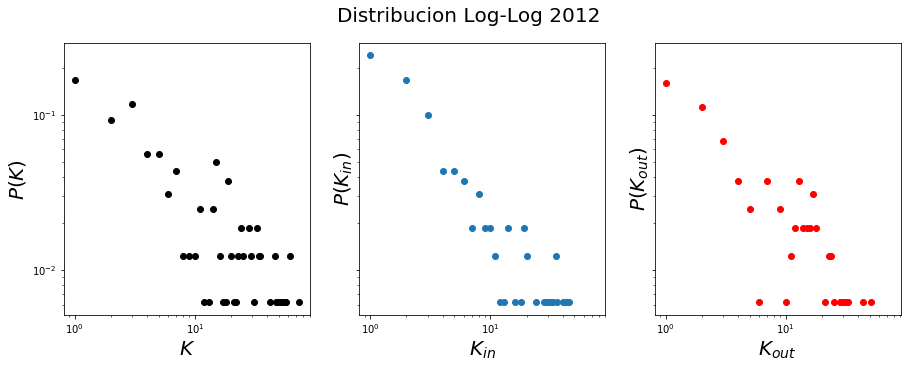

In [16]:
fig, (ax1, ax2 , ax3) = plt.subplots(1, 3 ,sharex = True, sharey = True, figsize=(15,5))
fig.suptitle('Distribucion Log-Log 2012',fontsize=20)
ax1.plot(X,P,'ko')
ax1.set_xlabel(r'$K$',fontsize=20)
ax1.set_ylabel(r'$P(K)$',fontsize=20)

ax2.plot(X_in,P_in,'o')
ax2.set_xlabel(r'$K_{in}$',fontsize=20)
ax2.set_ylabel(r'$P(K_{in})$',fontsize=20)

ax3.plot(X_out,P_out,'ro')
ax3.set_xlabel(r'$K_{out}$',fontsize=20)
ax3.set_ylabel(r'$P(K_{out})$',fontsize=20)

# Escala log-log
plt.xscale('log') 
plt.yscale('log') 

plt.savefig("Ley_de_potencias_2012.pdf")# Guardar la red en pdf.

plt.show()

## Medidas de Centralidades. 

### Centralidad por Numero de vinculacion o grado. 

Se ordena de mayor a menor los paises por el numero de vinculos internacionales en este mercado, en la siguiente lista por el numero de vinculos totales 

In [17]:
d=G.degree(G) #Vector con el par ordenado de numero de aristas de entrada a cada uno de los nodos
df=pd.DataFrame(d,columns=['Name', 'grado'])
#print(df.sort_values(by='grado', ascending=False)) # Ordena el DataFrame por valores asendentes.
df.to_excel("df_2012.xlsx") # Imprime el DataFrame a un xlsx

Ahora, por el numero de vinculos de entrada.

In [50]:
d_in=G.in_degree(G) #Vector con el par ordenado de numero de aristas de entrada a cada uno de los nodos
df_in=pd.DataFrame(d_in,columns=['Name', 'grado_in'])
#print(df_in.sort_values(by='grado_in', ascending=False)) # Ordena el DataFrame por valores asendentes.
df_in.to_excel("df_in_2012.xlsx") # Imprime el DataFrame a un xlsx

import plotly.express as px

fig = px.choropleth(df_in, locations="Name", color="grado_in", hover_name="Name", color_continuous_scale=px.colors.sequential.Cividis_r)
fig.show()

En la siguiente lista se encuentran los paises ordenados por numero de vinculos de exportacion. 

In [51]:
d_out=G.out_degree(G)
df_out=pd.DataFrame(d_out, columns=['Name', 'grado_out'])
#print(df_out.sort_values(by='grado_out', ascending=False))
df_out.to_excel("df_out_2012.xlsx") # Imprime el DataFrame a un xlsx

import plotly.express as px

fig = px.choropleth(df_out, locations="Name", color="grado_out", hover_name="Name", color_continuous_scale=px.colors.sequential.Cividis_r)
fig.show()

Para tener una visualizacion de que paises tienen un numero significativo de vinculos, hacemos el tamaño de nodos variables respecto al numero de vertices de salida y de entrada respectivamente. 

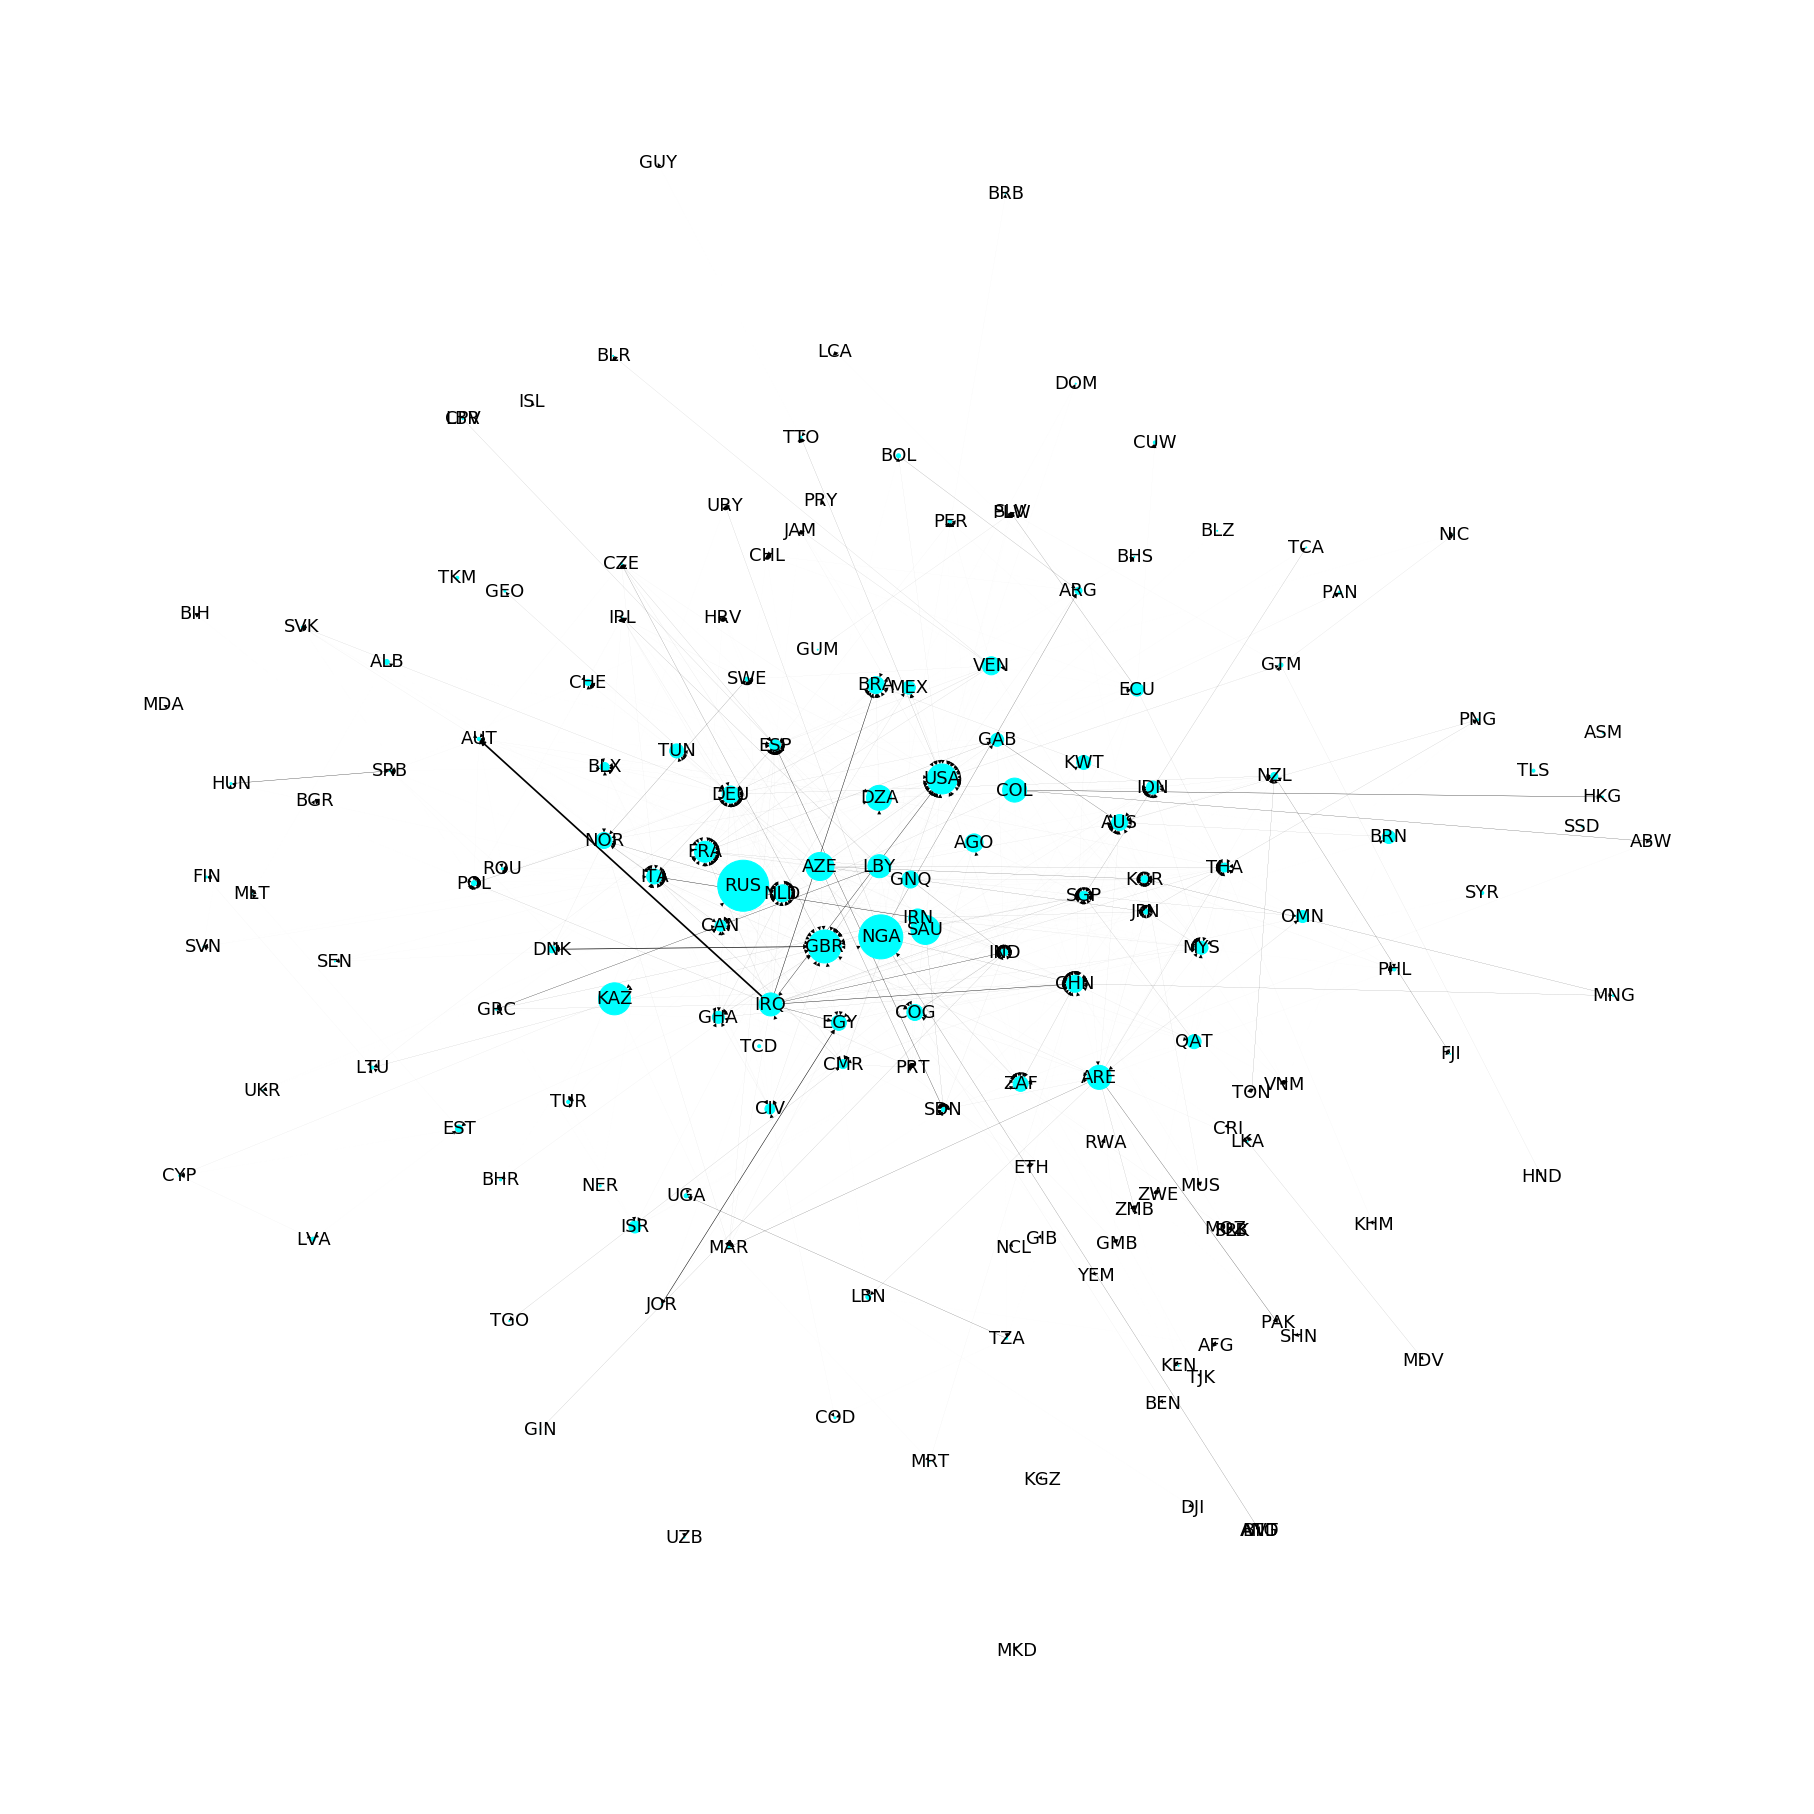

In [20]:
SIZE_OUT=[]
df_out=df_out[['grado_out']]
df_out.values
for i in df_out.values:
    SIZE_OUT.append(i*i)    
weight=WEIGHT.values 


plt.figure(3,figsize=(25,25)) #define el tamaño del dibujo del grafo

nx.draw_kamada_kawai(G,width=weight,font_size=18,node_color='cyan',node_size=SIZE_OUT,with_labels=True) 

#TIPOS DE GRAFICOS EN NETWORKX
#nx.draw_random(G)  
#nx.draw_circular(G)  
#nx.draw_spectral(G)  
#nx.draw_spring(G)  

plt.savefig("C_d_out_2012.pdf")# Guardar la red en pdf. 
plt.show()


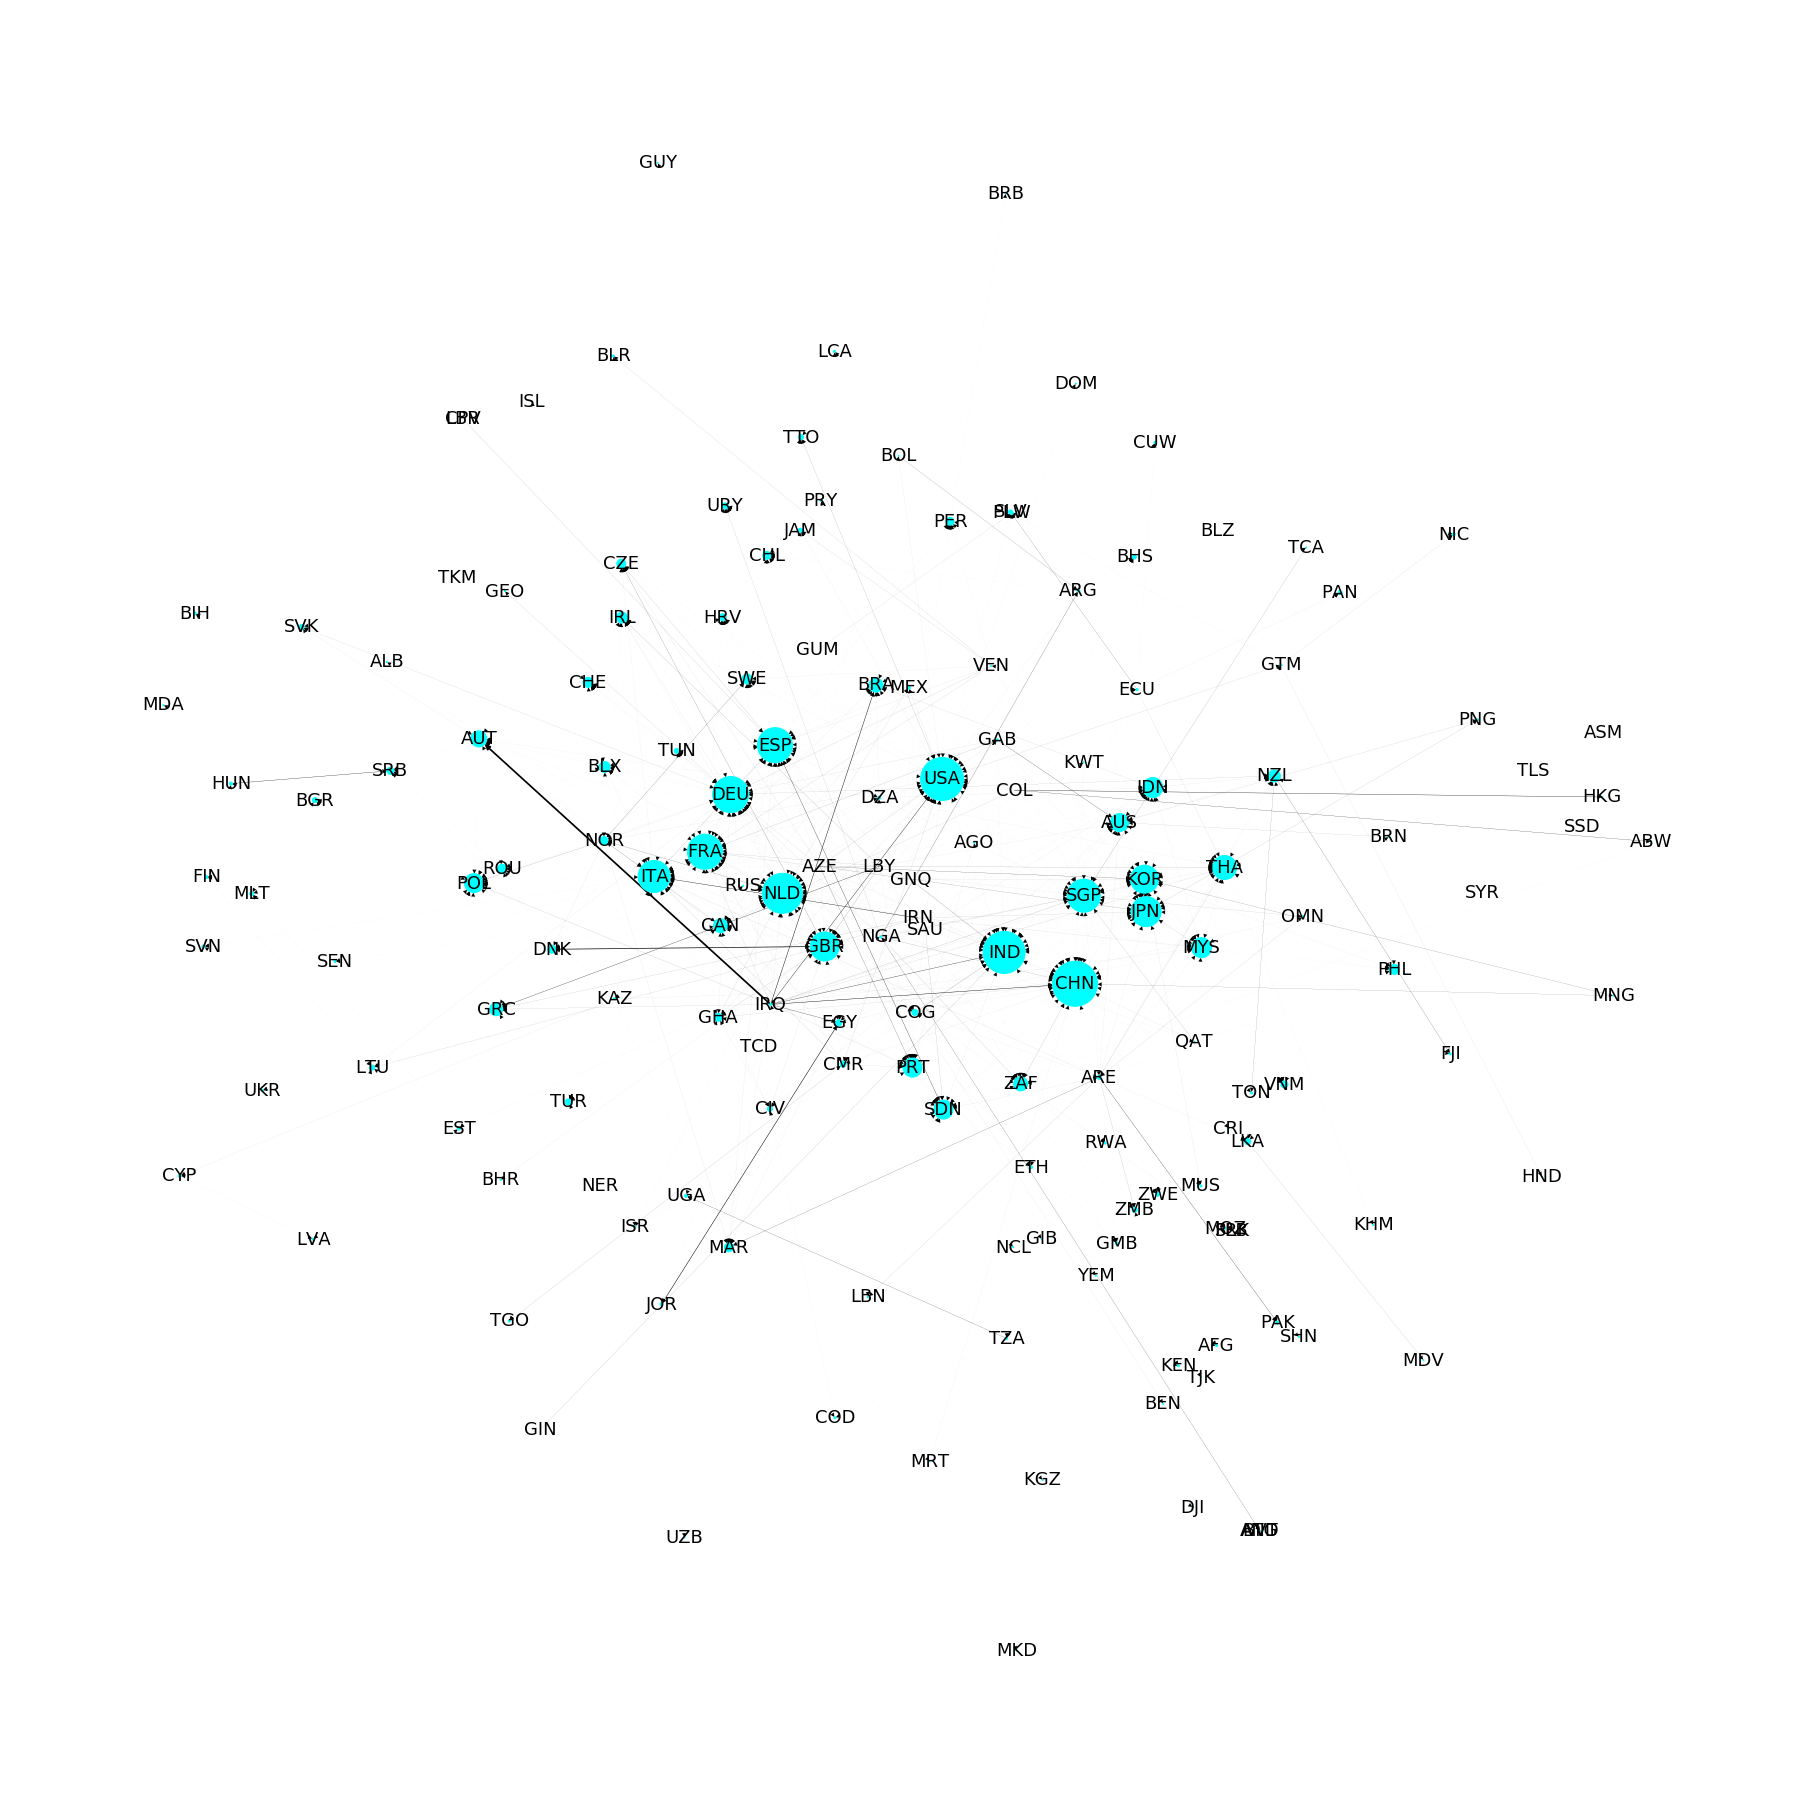

In [21]:
SIZE_IN=[]
df_in= df_in[['grado_in']]
df_in.values
for i in df_in.values:
    SIZE_IN.append(i*i)     
weight=WEIGHT.values 

plt.figure(3,figsize=(25,25)) 
nx.draw_kamada_kawai(G,width=weight,font_size=18,node_color='cyan',node_size=SIZE_IN,with_labels=True)
plt.savefig("C_d_in_2012.pdf")# Guardar la red en pdf. 
plt.show()

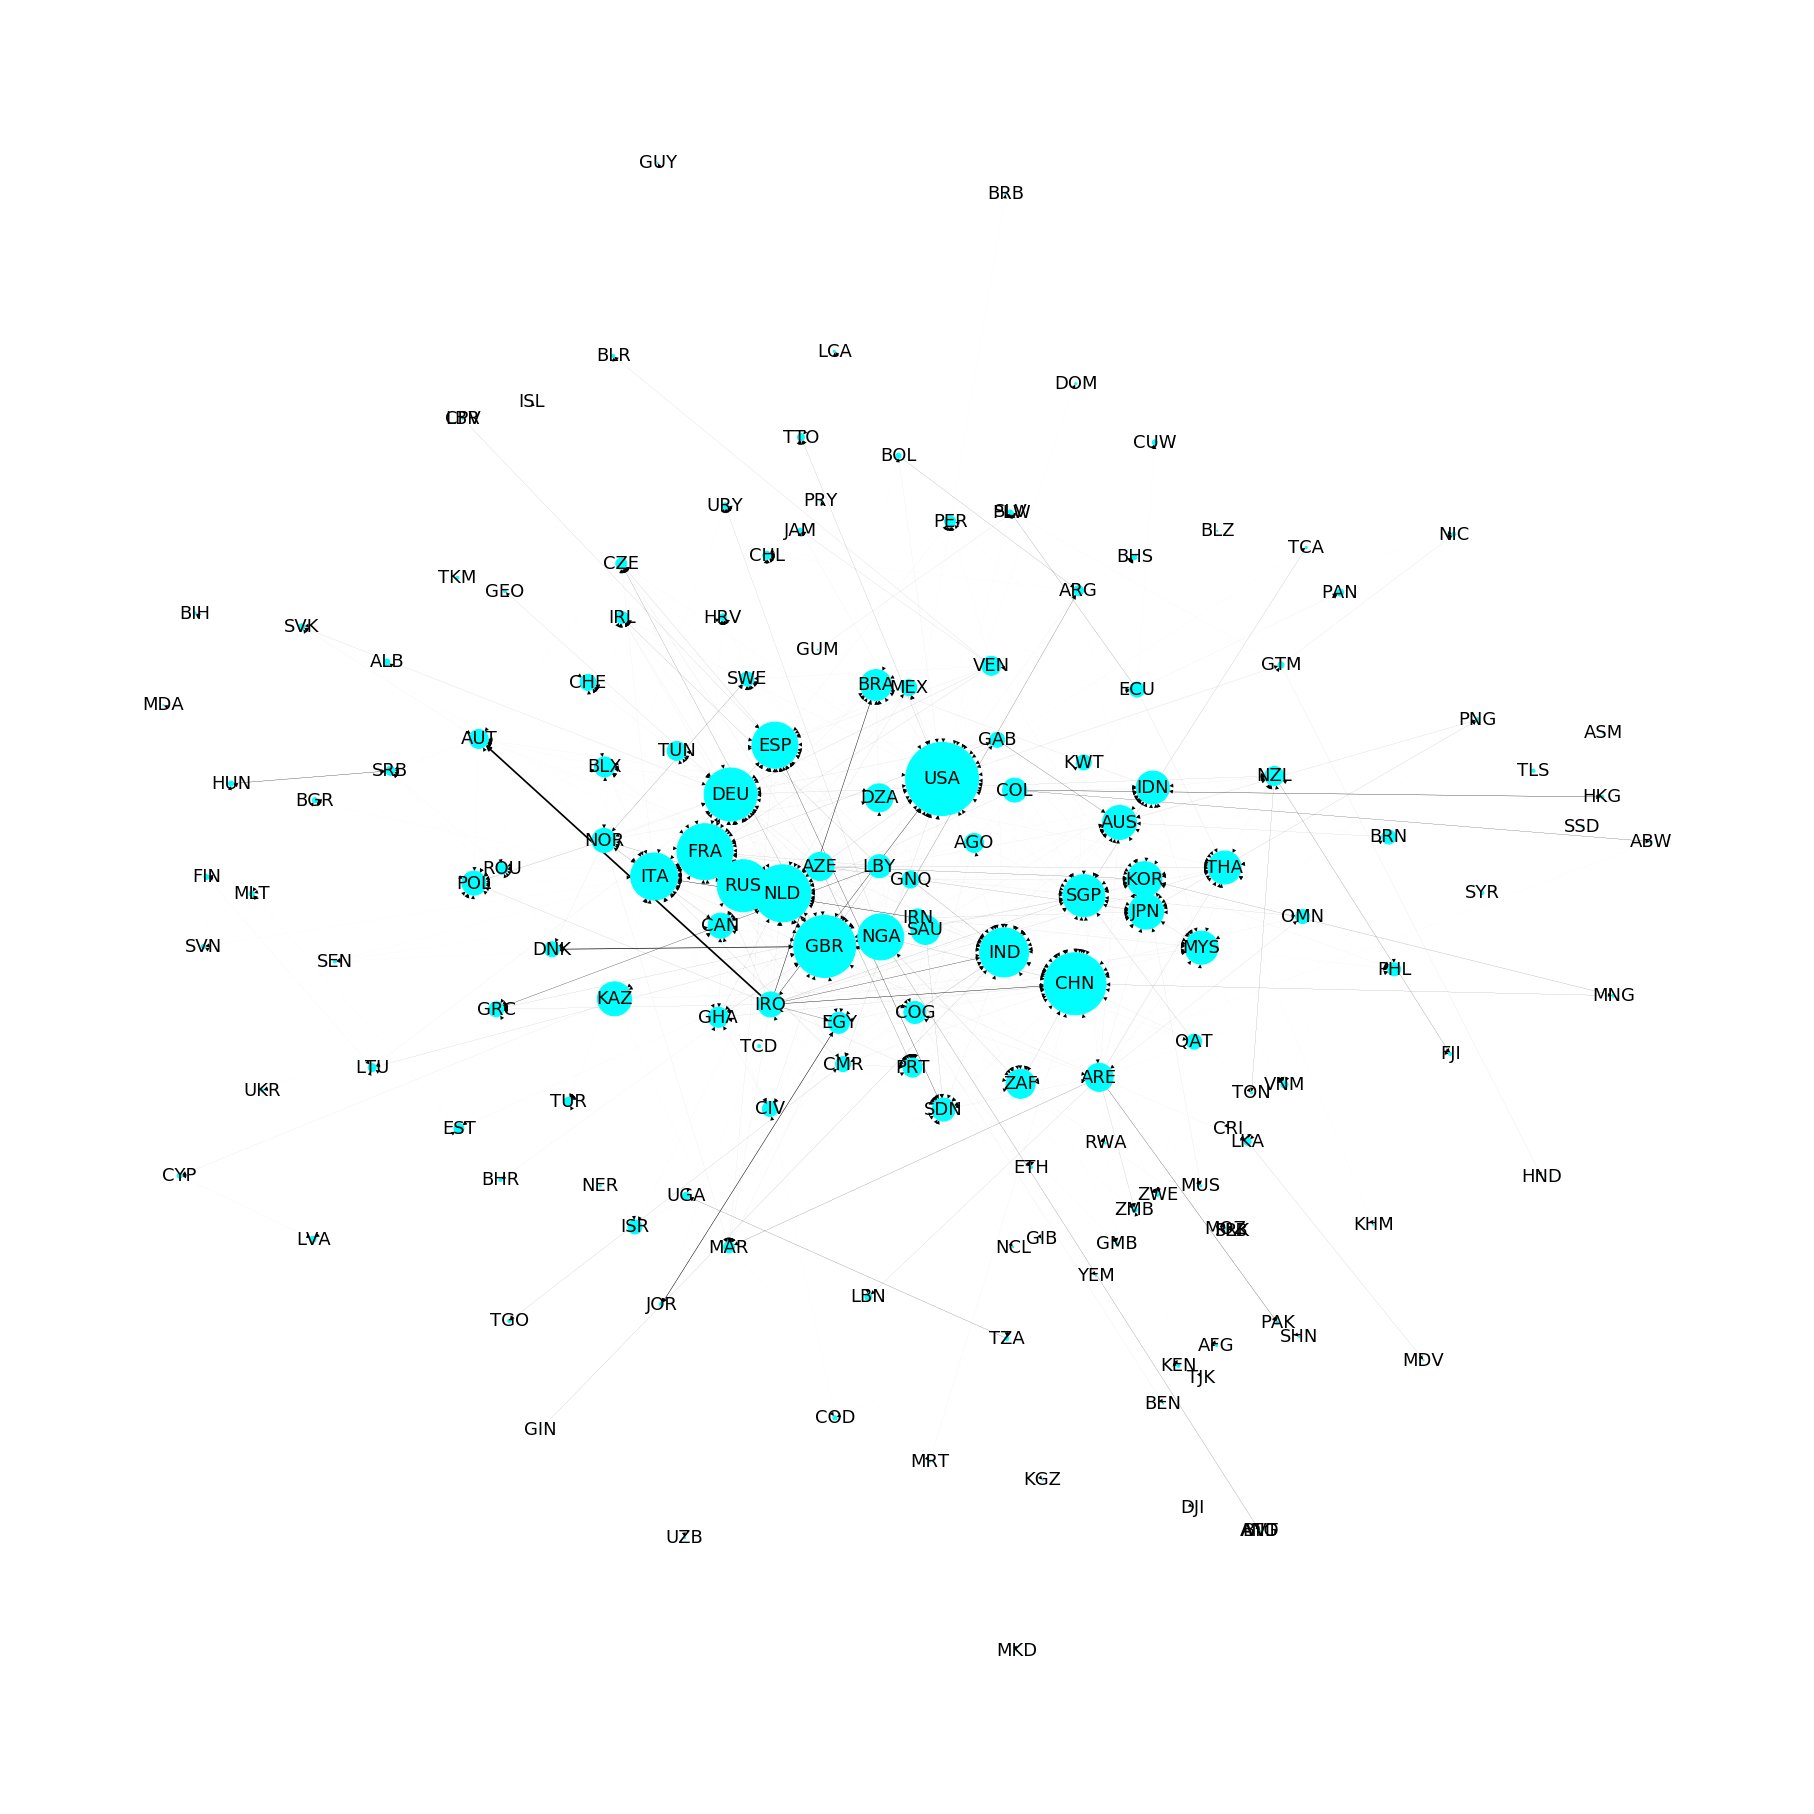

In [22]:
SIZE=[]
df= df[['grado']]
df.values
for i in df.values:
    SIZE.append(i*i)     
weight=WEIGHT.values 

plt.figure(3,figsize=(25,25)) 
nx.draw_kamada_kawai(G,width=weight,font_size=18,node_color='cyan',node_size=SIZE,with_labels=True)
plt.savefig("C_d_2012.pdf")
plt.show()

### Centralidad por intermediacion.

In [56]:
intr=nx.betweenness_centrality(G) #dicionario en python
intr = pd.DataFrame([[key, intr[key]] for key in intr.keys()], columns=['Name', 'intermediacion'])
#print(intr.sort_values(by='intermediacion', ascending=False))
intr.to_excel("intr_2012.xlsx") # Imprime el DataFrame a un xlsx

import plotly.express as px

fig = px.choropleth(intr, locations="Name", color="intermediacion", hover_name="Name", color_continuous_scale=px.colors.sequential.Cividis_r,range_color=[0,0.273])
fig.show()

Intermediacion promedio = [0.0077127]


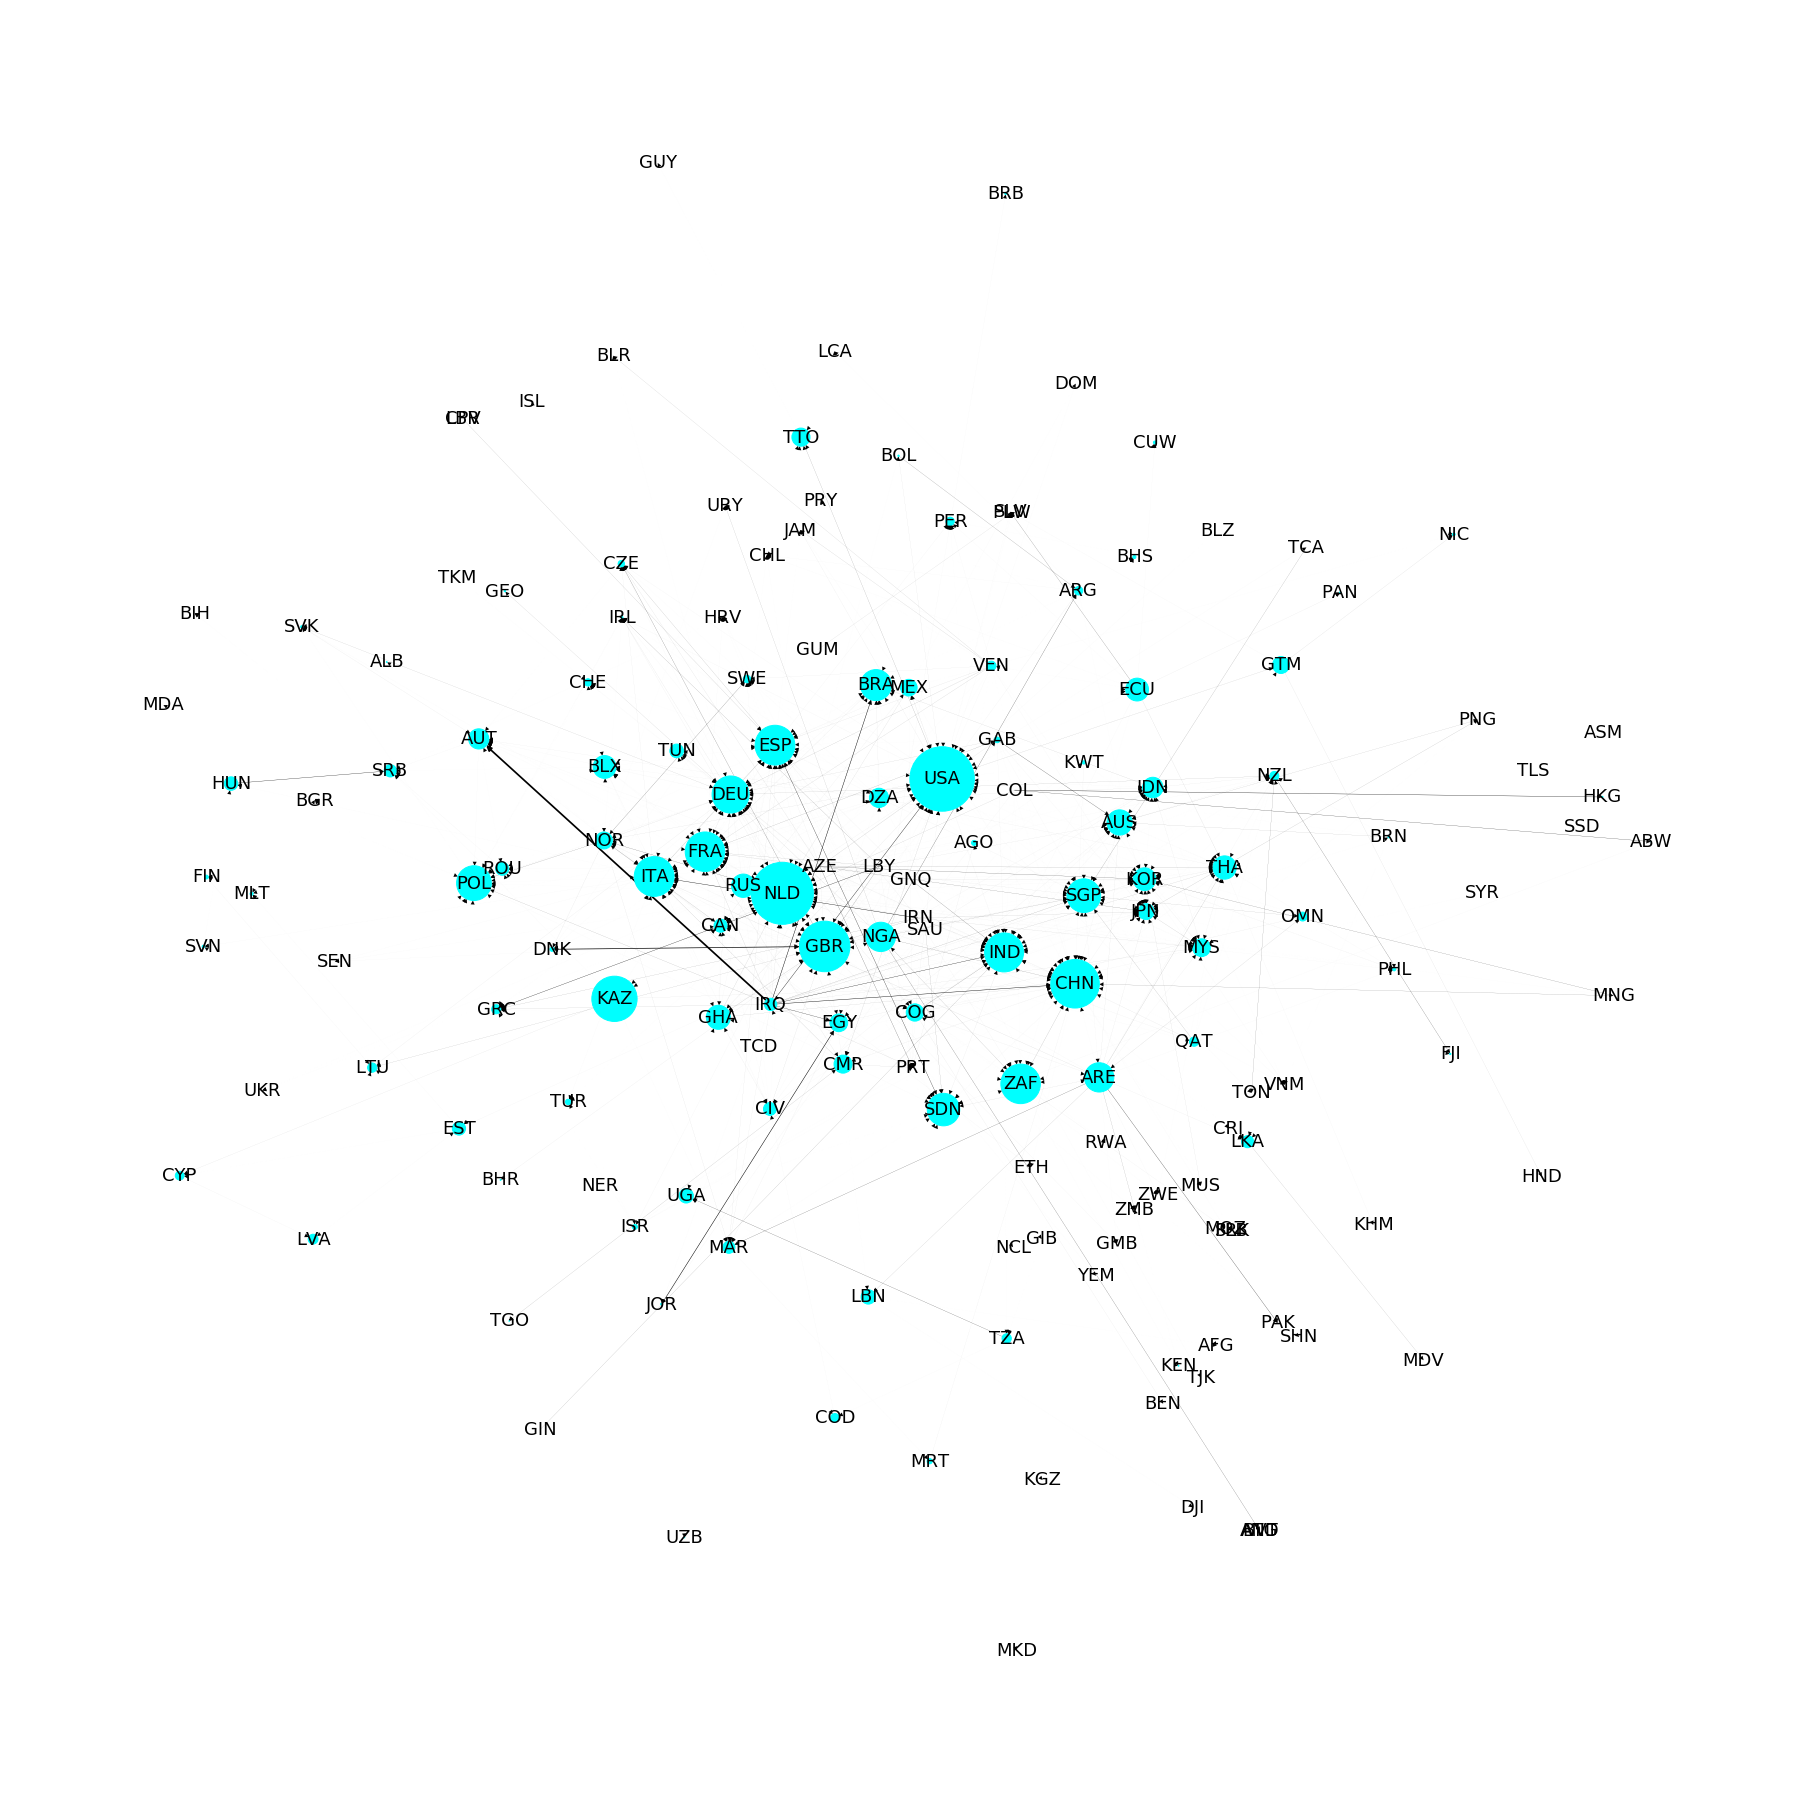

In [24]:
SIZE_INTR=[]
intr= intr[['intermediacion']]
intr.values
suma=0
for i in intr.values:
    suma=i+suma
    SIZE_INTR.append((i*100000/3))     
weight=WEIGHT.values 

# INTERMEDIACION PROMEDIO 
print("Intermediacion promedio =",suma/g)

plt.figure(3,figsize=(25,25)) 
nx.draw_kamada_kawai(G,width=weight,font_size=18,node_color='cyan',node_size=SIZE_INTR,with_labels=True)
plt.savefig("C_B_2012.pdf")
plt.show()

### Promedio de Intertaciones ponderada

In [25]:
suma=0
for i in POND.values:
     suma=i/109.45+suma
print(suma/g)

[1.07166422e+08]


In [26]:
DFPOND.to_excel("egdeW_2012.xlsx") # Imprime el DataFrame a un xlsx

### Centralidad de grado ponderado

Esta centralidad refleja la importancia que tiene para la red los nodos que mas aportan barriles al comercio, tanto por su flujo de salida como de entra. Los paises que en este sentido son mas centrales por su flujo de salida son: 

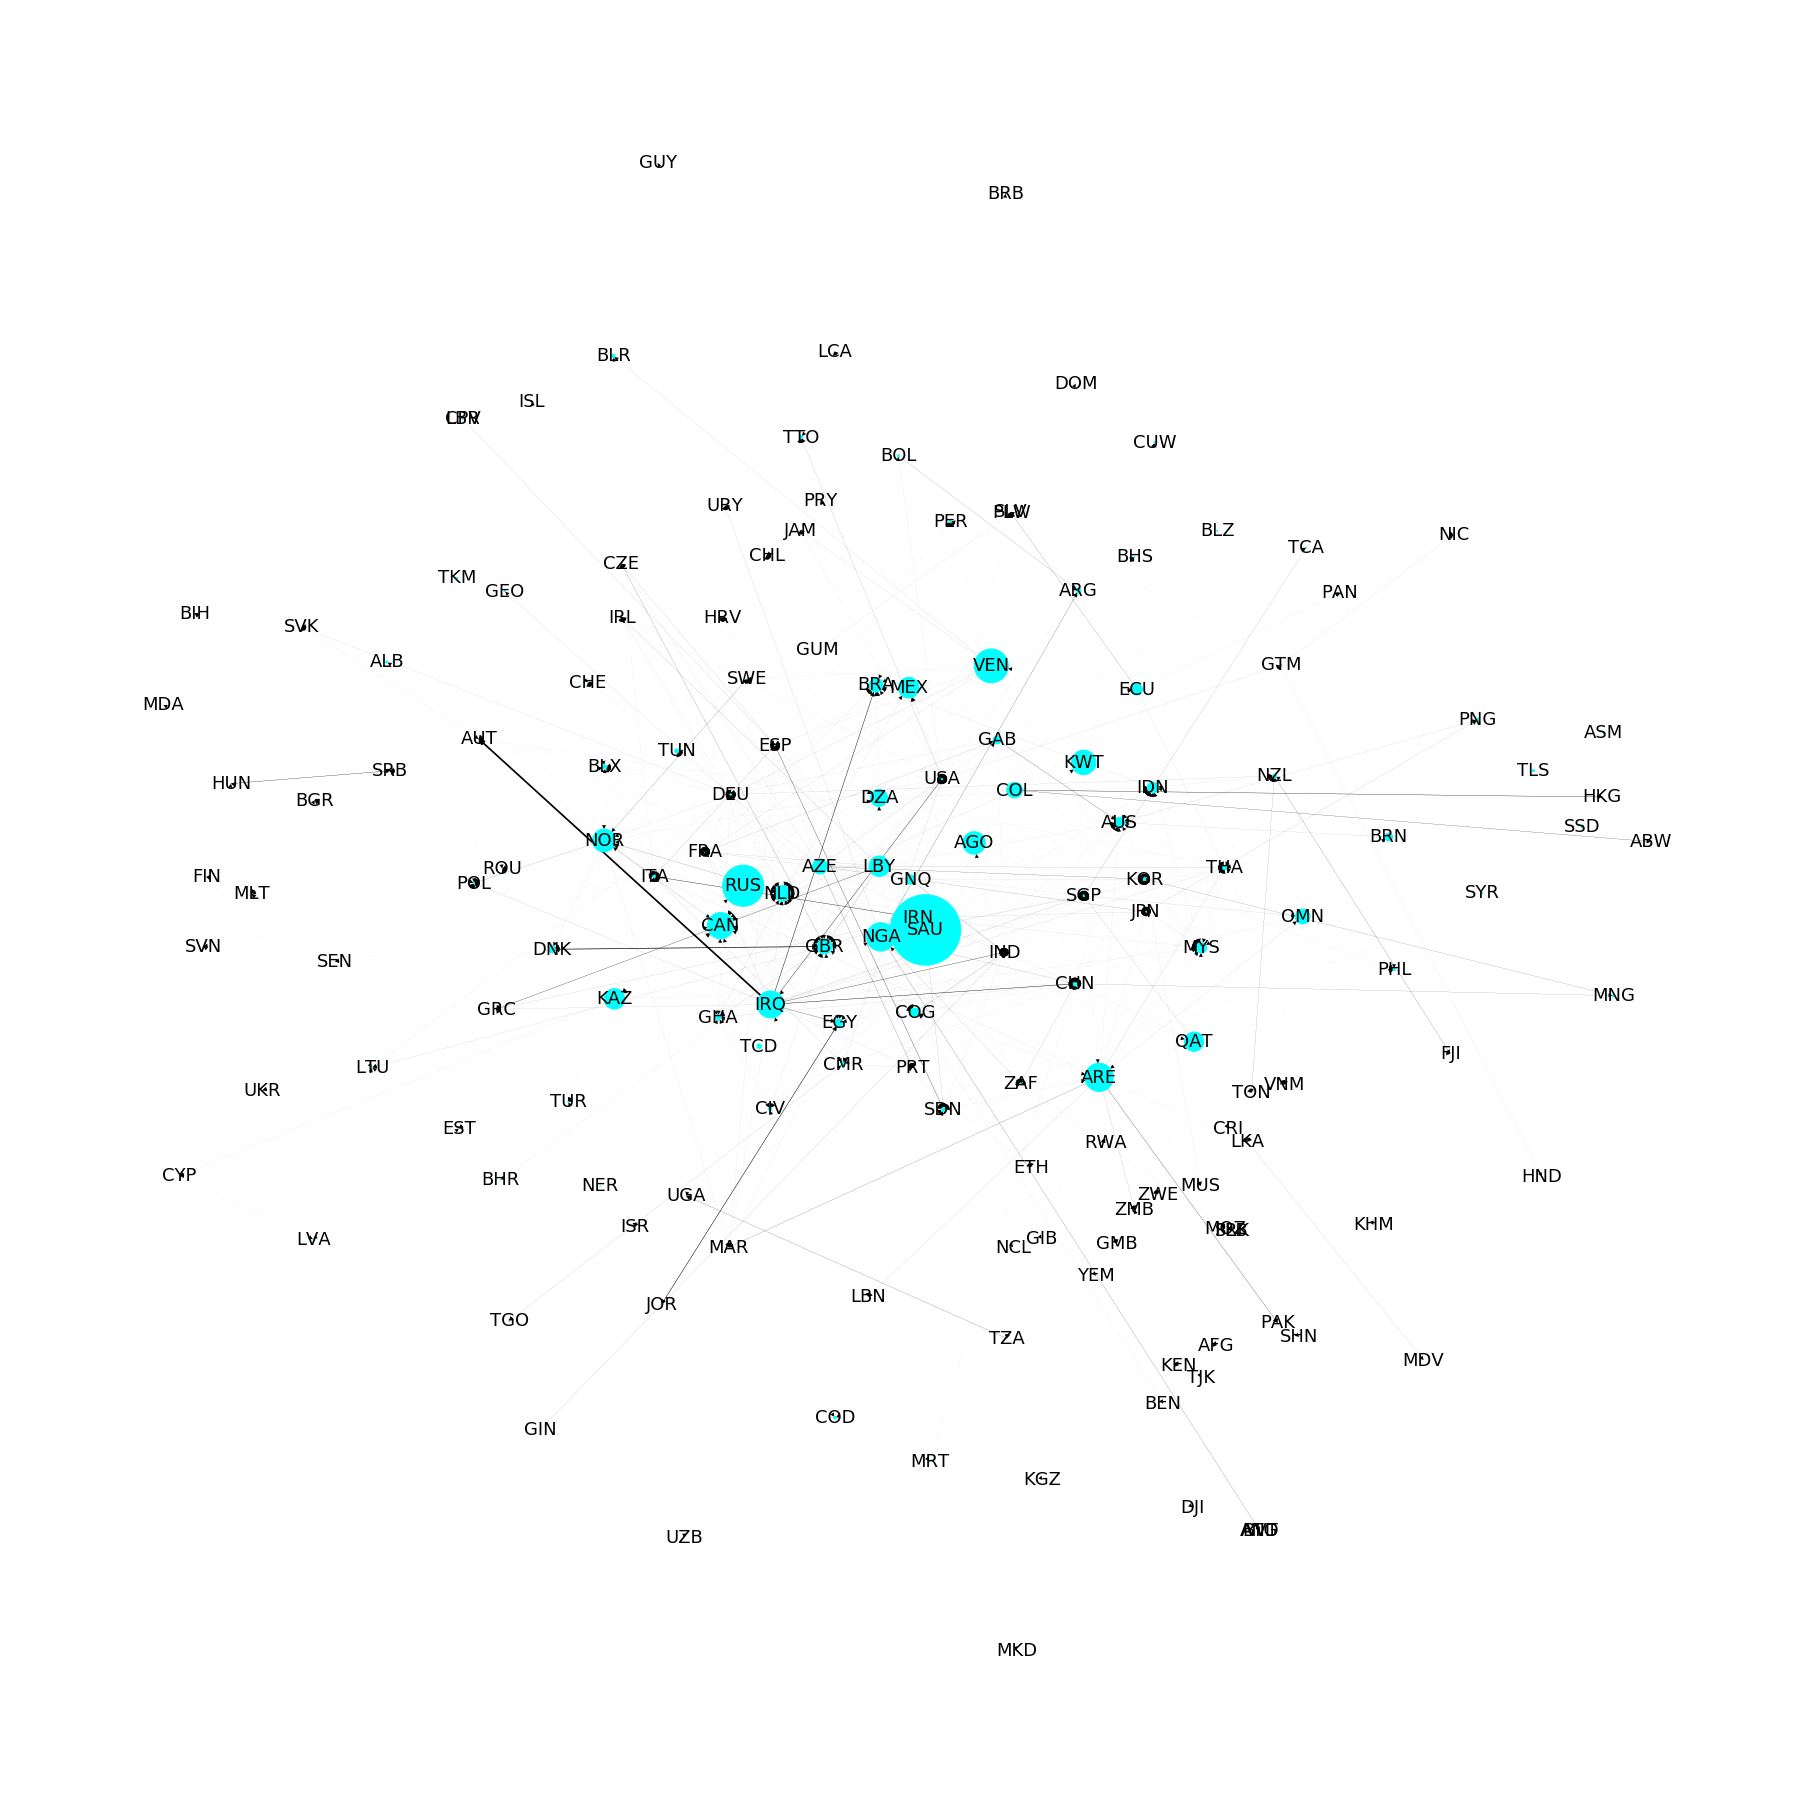

In [27]:
nodes=G.nodes

Ponderado_out=[]
Pond_out=pd.DataFrame(columns=['Barriles de petrolio/e10'])  
for j in nodes:
    suma=0
    for i in DFPOND.values:    
        if  i[0] == j :  
            suma=i[2]/109.45e6+suma   
    Ponderado_out.append(suma) 
    Pond_out.loc[j]=suma        

    
#print(Pond_out.sort_values(by='Barriles de petrolio/e10', ascending=False))
Pond_out.to_excel("C_exbarr_2012.xlsx") # Imprime el DataFrame a un xlsx


plt.figure(3,figsize=(25,25)) 
nx.draw_kamada_kawai(G,width=weight,font_size=18,node_color='cyan',node_size=Ponderado_out,with_labels=True)
plt.savefig("C_dw_out_2012.pdf")
plt.show()

Y los nodos con mayor centralidad por la cantidad de flujo entrante de barriles son:

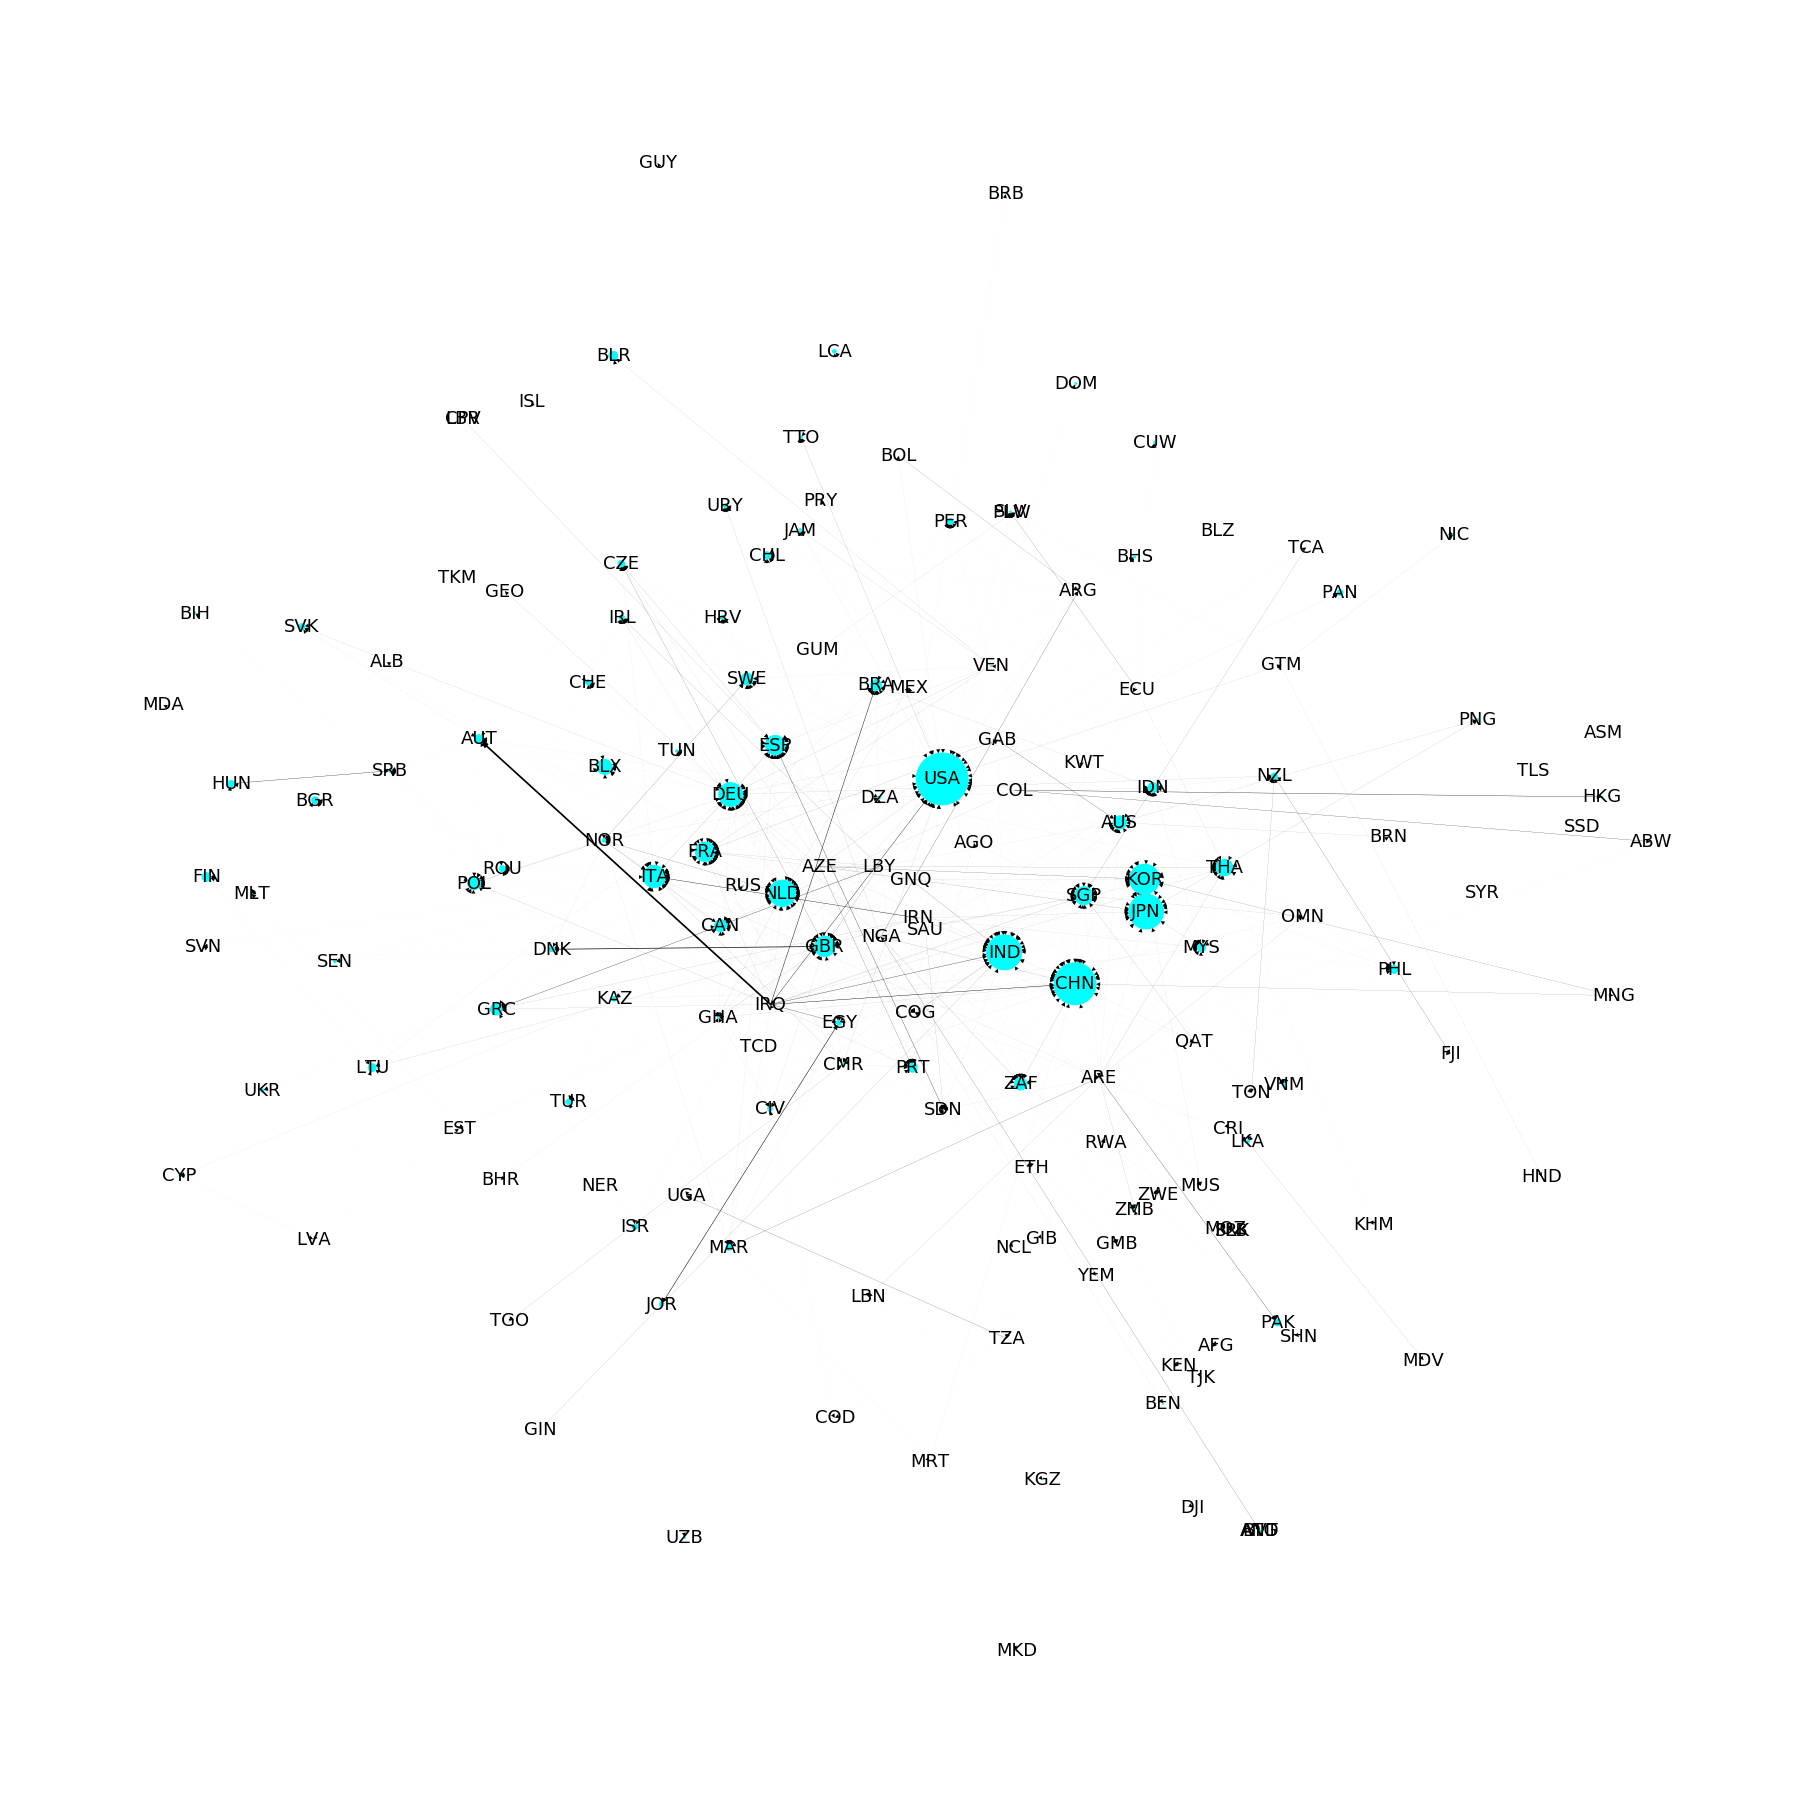

In [28]:
Ponderado_in=[]
Pond_in=pd.DataFrame(columns=['Barriles de petrolio/e6'])  
for j in nodes:
    suma=0
    for i in DFPOND.values:    
        if  i[1] == j :  
            suma=i[2]/109.45e6+suma   
    Ponderado_in.append(suma) 
    Pond_in.loc[j]=suma        

    
#print(Pond_in.sort_values(by='Barriles de petrolio/e6', ascending=False))
Pond_in.to_excel("C_inbarr_2012.xlsx") # Imprime el DataFrame a un xlsx


plt.figure(3,figsize=(25,25)) 
nx.draw_kamada_kawai(G,width=weight,font_size=18,node_color='cyan',node_size=Ponderado_in,with_labels=True)
plt.savefig("C_dw_in_2012.pdf")
plt.show()


### Centralidad de intermediacion vs Centralidad de grado 

Queremos comparar aqui, como se comporta la intermediacion de los nodos dado su grado: 

Error cuadrático medio: 0.00
Coeficiente beta1:  [0.00101675]


<function matplotlib.pyplot.show(*args, **kw)>

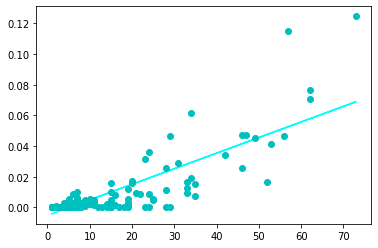

In [29]:
#FUNCION DE AJUSTE
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

modelo = linear_model.LinearRegression()
modelo.fit(df.values,intr.values)
y_pred = modelo.predict(df.values)
print( u'Error cuadrático medio: %.2f' % mean_squared_error(intr.values, y_pred))
print( u'Coeficiente beta1: ', modelo.coef_[0])
plt.plot(df.values, y_pred, color='cyan')

plt.plot(df.values,intr.values,'co')
plt.show

Podemos darnos cuenta que para nuestra red, la centralidad de intermediacion crece con el grado de vinvulacion del nodo.

#### Otra funcion de ajutes (Algoritmo)

Linea de mejor ajuste: Y= -0.005296638552635376 + 0.0010167495582491083*X


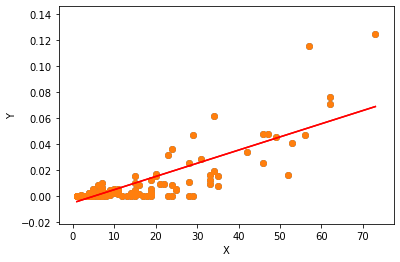

In [30]:
import statsmodels.api as sm 
import statsmodels.stats.diagnostic as smd 

def reglin(x,y):
    x=sm.add_constant(x)
    model=sm.OLS(y,x).fit()
    B0=model.params[0]
    B1=model.params[1]
    x=x[:,1]
    
    #returna el summary y la grafica 
    x2=np.linspace(x.min(),x.max(),100)
    y_hat=x2*B1+B0
    plt.scatter(x,y,alpha=1)
    plt.plot(x2,y_hat,'r',alpha=1)
    plt.xlabel('X')
    plt.ylabel('Y')
    return model,B0,B1
    
print("Linea de mejor ajuste: Y= {0} + {1}*X".format(reglin(df.values,intr.values)[1],reglin(df.values,intr.values)[2]))

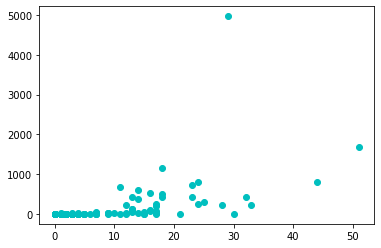

In [31]:
plt.plot(df_out,Ponderado_out, 'co')
plt.show()

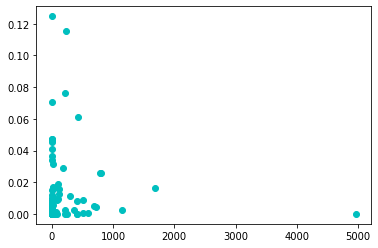

In [32]:
plt.plot(Ponderado_out,intr.values,'co')

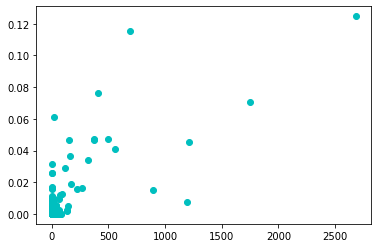

In [33]:
plt.plot(Ponderado_in,intr.values,'co')

### Centralidad por cercania

In [34]:
cerc=nx.closeness_centrality(G)
cerc= pd.DataFrame([[key, cerc[key]] for key in cerc.keys()], columns=['Name', 'Cercania'])
#print(cerc.sort_values(by='Cercania', ascending=False))
cerc.to_excel("cerc_2012.xlsx") # Imprime el DataFrame a un xlsx

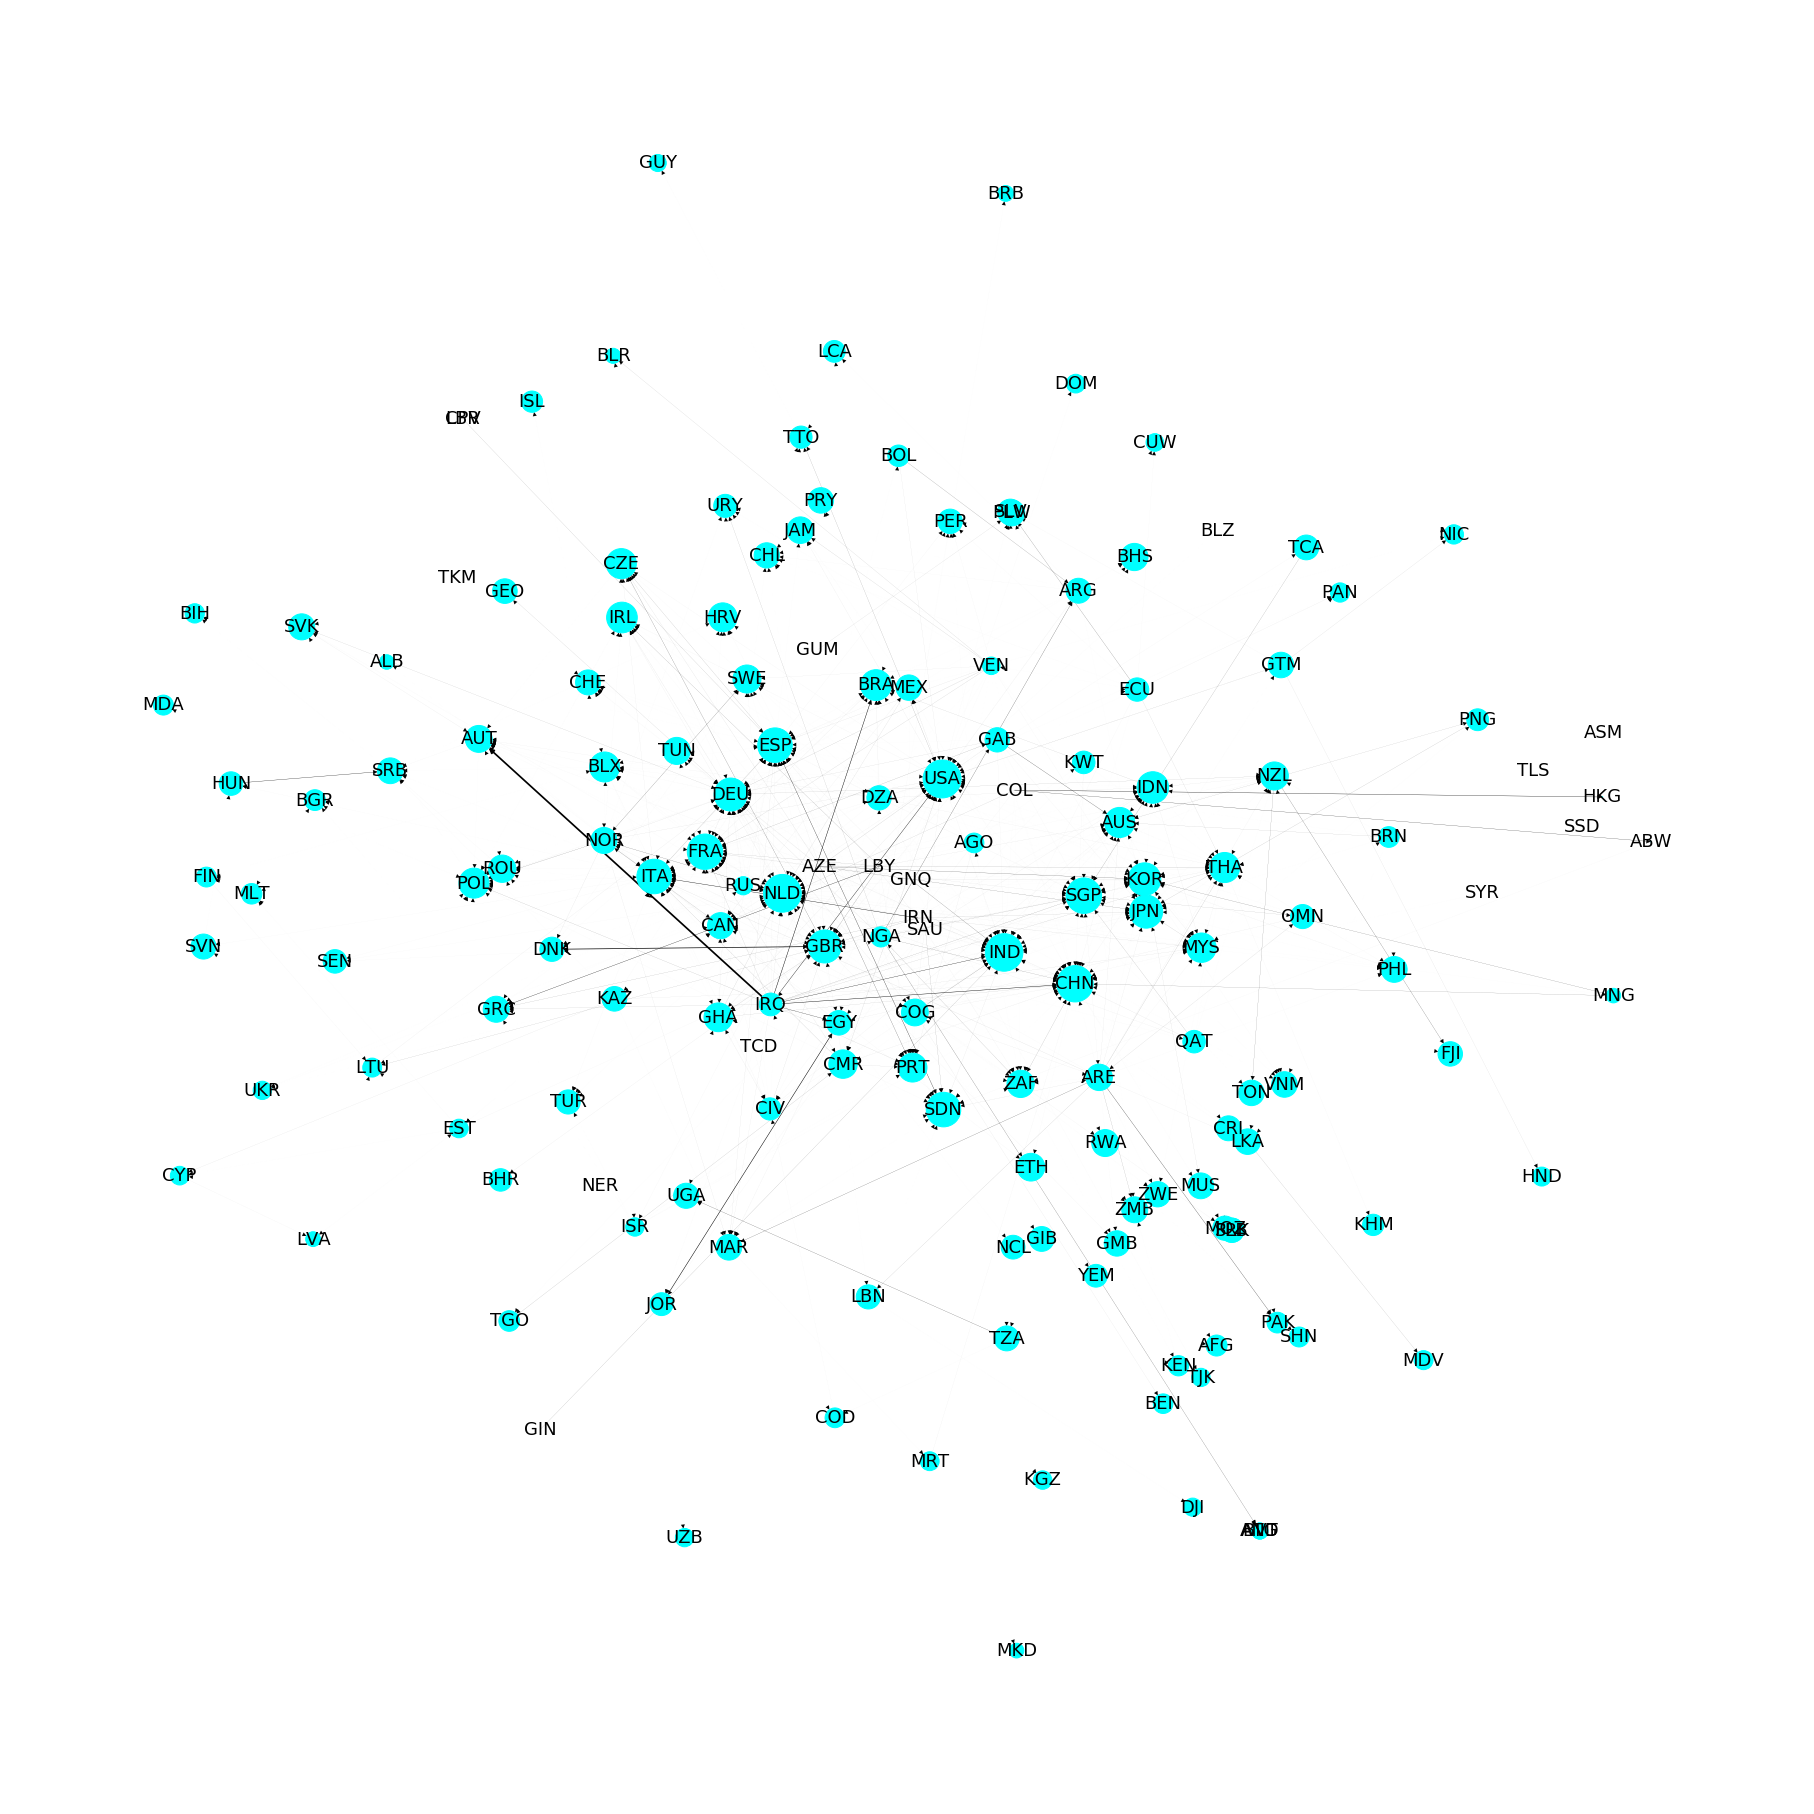

In [35]:
SIZE_CERC=[]
cerc= cerc[['Cercania']]

for i in cerc.values:
    SIZE_CERC.append((i*100)**2)     
weight=WEIGHT.values 

plt.figure(3,figsize=(25,25)) 
nx.draw_kamada_kawai(G,width=weight,font_size=18,node_color='cyan',node_size=SIZE_CERC,with_labels=True)
plt.savefig("C_C_2012.pdf")
plt.show()

### Censo de triadas

### Coeficiente de clusterizacion 

In [36]:
Cluster=nx.clustering(G)
Cluster= pd.DataFrame([[key, Cluster[key]] for key in Cluster.keys()], columns=['Name', 'Coeff_Clusterin'])
#print(Cluster.sort_values(by='Coeff_Clusterin', ascending=False))

### Asortatividad

Los valores positivos de r indican una correlación entre nodos de grado similar, mientras que los valores negativos indican relaciones entre nodos de grado diferente. En general, r se encuentra entre −1 y 1. Cuando r = 1, se dice que la red tiene patrones de mezcla surtidos perfectos, cuando r = 0 la red no es surtativa, mientras que en r = −1 la red es completamente desordenada.

In [37]:
r=nx.degree_assortativity_coefficient(G)
print(r)

-0.15647747804745699


### N-Cliques

Un clique es un sub-grafo en el cual todos  los nodos del sub-grafo estan conectados entre si,es decir que este es un grafo completo. El N-clique es el clique de N aristas por nodo. 

El clique es un sub-grafo no dirigido y se buscara dentro de grafos no dirigidos.

N-clique mas grande de nuestra red se puede encontrar como: 

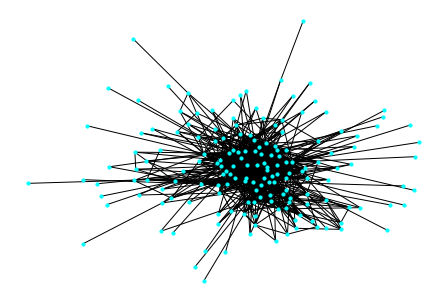

In [38]:
Gnd = nx.Graph() # grafo no dirigido 
nx.graph_clique_number(Gnd) #tamaño de la camarilla más grande para G.
    
Gnd.add_edges_from(EDGES.values)


nx.draw(Gnd,node_size=10,font_size=10,node_color='cyan') 



In [39]:
nx.graph_clique_number(Gnd) #tamaño de la camarilla más grande para G.

8

El número de cliques maximales en el grafo.

In [40]:
nx.graph_number_of_cliques(Gnd) #Devuelve el número de camarillas máximas en G.

691

In [41]:
A=nx.number_of_cliques(Gnd)#Devuelve el número de camarillas máximas para cada nodo.
Cliques= pd.DataFrame([[key, A[key]] for key in A.keys()], columns=['Name', '#_Clique_max'])
print(Cliques.sort_values(by='#_Clique_max', ascending=False))
Cliques.to_excel("Cliques_2012.xlsx")

    Name  #_Clique_max
20   GBR           221
26   USA           220
22   NLD           209
8    CHN           189
19   FRA           133
..   ...           ...
138  RWA             1
139  GIB             1
106  GEO             1
105  NCL             1
166  CRI             1

[167 rows x 2 columns]


In [42]:
cliquesn = nx.nx.find_cliques(Gnd)
cliques4 = [clq for clq in cliquesn if len(clq) >= 8]
#print(cliques4)

In [43]:
nodes = set(n for clq in cliques4 for n in clq)
h = Gnd.subgraph(nodes)

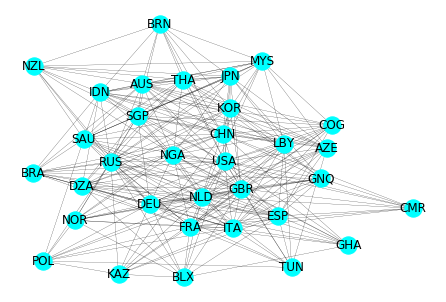

In [44]:
deg = nx.degree(h)
nodes = [n for n in nodes if deg[n] >= 8]
#print(nodes)
k = h.subgraph(nodes)
nx.draw(k,with_labels=True,width=0.2, node_color='cyan')
plt.savefig("Max_Clique_2012.pdf")
plt.show()

In [45]:
g=nx.number_of_nodes(k)
print('g=',g)
L=nx.number_of_edges(k)
print('L=',L)

g= 33
L= 273


In [46]:
grado_promedio=L/g
print(grado_promedio)

8.272727272727273


In [47]:
L_p=g*(g-1)/2
print('L_p =', L_p)
rho=L/L_p
print('Densidad =',rho)

L_p = 528.0
Densidad = 0.5170454545454546


['DZA', 'POL', 'LBY', 'RUS', 'THA', 'GNQ', 'JPN', 'DEU', 'COG', 'NZL', 'NLD', 'CMR', 'MYS', 'BLX', 'NGA', 'BRA', 'ESP', 'SAU', 'NOR', 'KOR', 'SGP', 'GHA', 'AUS', 'TUN', 'IDN', 'CHN', 'BRN', 'KAZ', 'USA', 'ITA', 'AZE', 'GBR', 'FRA']


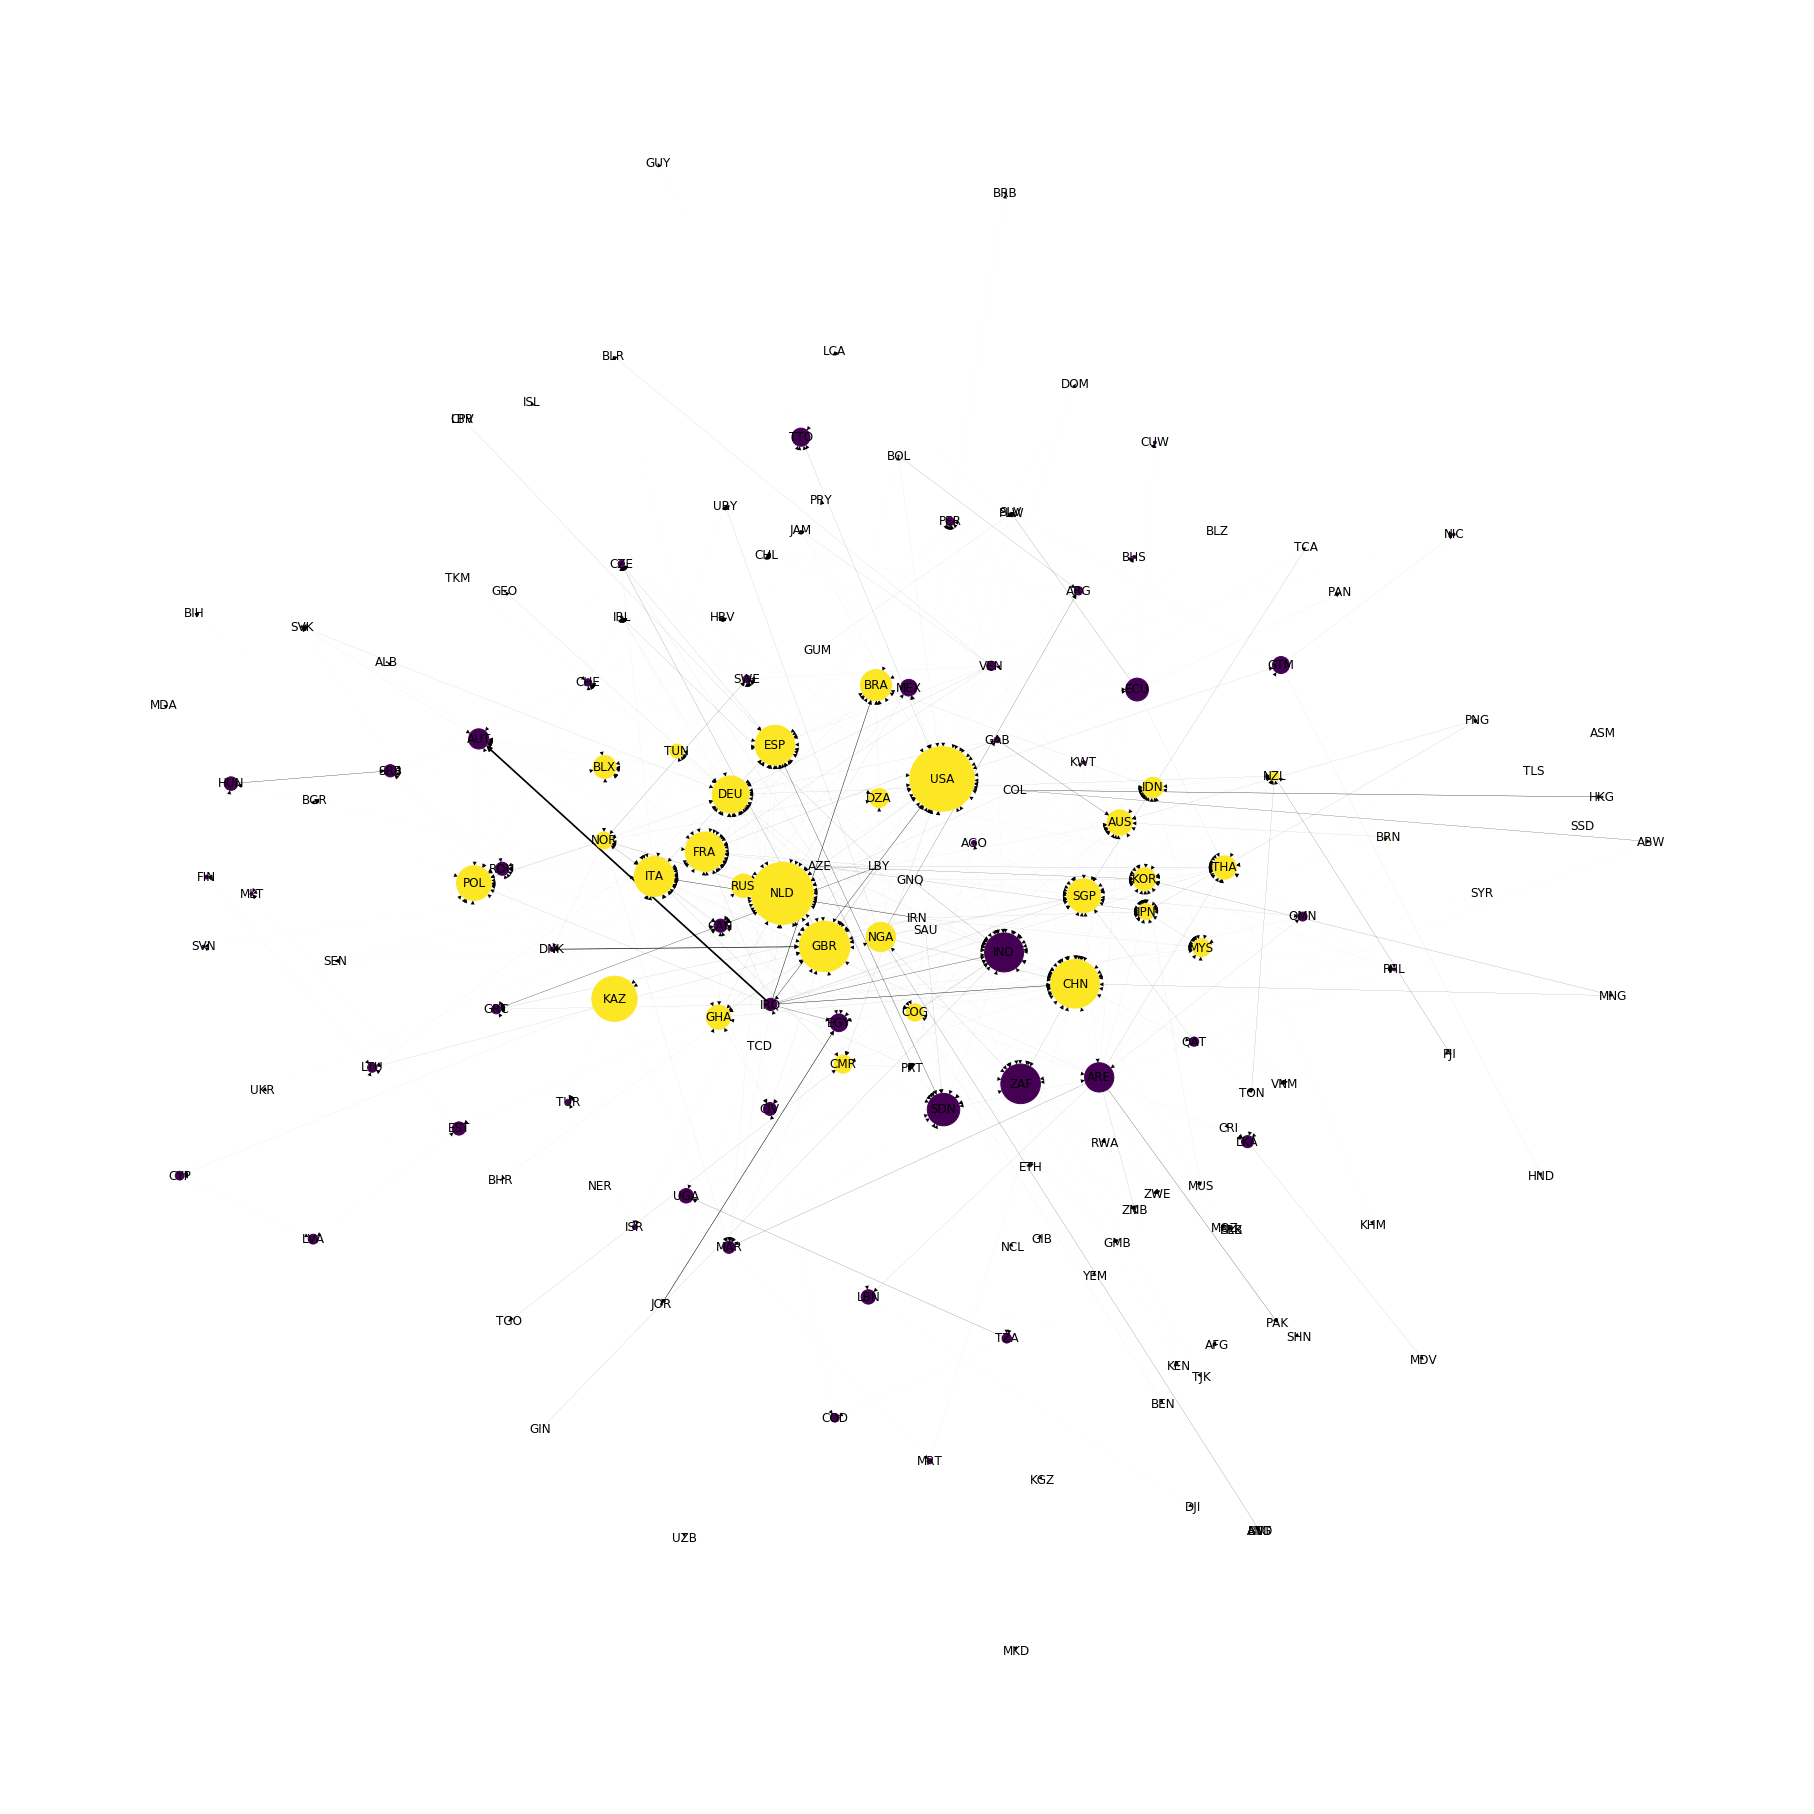

In [48]:
nodes=h.nodes
print(nodes)

val_map = {}
for i in nodes: 
    val_map[i]= 1.0
    
values = [val_map.get(node, 0.25) for node in G.nodes()]
    
  

plt.figure(3,figsize=(25,25)) 
nx.draw_kamada_kawai(G,width=weight,font_size=12, node_color=values ,node_size=SIZE_INTR ,with_labels=True)
plt.savefig("Max_Clique_Nx_2012.pdf")
plt.show()


### Diametro del grafo 

In [49]:
nx.diameter(Gnd)

5